# TABLE OF CONTENTS
1. [PROBLEM DESCRIPTION](#prob)
2. [DATA DESCRIPTION](#data)
3. [BACKGROUND INFORMATION](#research)
4. [READ IN THE DATA](#read)
5. [GETTING TO KNOW THE DATA](#know)
6. [DATA PREPARATION](#prepare)
7. [ANALYSIS AND INSIGHTS](#analysis)
9. [VISUALS](#visuals)
9. [CONCLUSION](#conclusion)
 


  


# PROBLEM DESCRIPTION<a id='prob'></a>

In real-world data science, it's extremely rare to have an ideal data set to begin with. Instead data often has to be aggregated from disparate sources and a good amount of data cleaning has to be done before we can do any analysis and modeling work. In this project, we'll go through the first part of a complete data science project which begins with the acquisition of raw data. The primary focus in this project will be on data acquisition, preparation, cleaning, and aggregation followed by exploratory data analydis. We will combine several messy data sets into a single clean master dataset before conducting further analysis. For the purposes of this project, we will be using data about United States population, its unemployment and the natural disasters occured in the country during the year 2020.

# Data Description <a id='data'></a>

The rising unemployment rate is a big concern in the United States since the pandemic. Also, the United States experience a large variety of natural disasters each year: devastating hurricanes, seasonal tornadoes, and scorching wild fires are among the events that endanger many lifes and cause billions of dollars in damages. Keeping these issues in mind, we will try to formulate the relation between the unemployment in the population of US with the increasing natural disasters occuring every year in the states.

The population of US is made available by an official website of the United States government which is https://www2.census.gov/. Our another dataset which is unemployment is also available on official website of the United States government which is https://www.ers.usda.gov/. Our last dataset is disaster declarations in US which is available on https://www.kaggle.com/datasets/headsortails/us-natural-disaster-declarations.

So let us create a new directory named "schools" in our project directory and download these three files. A concise description of our main datasets is as follows:

Main datasets:
data/co-est2021-alldata.csv :  This dataset describes about the population of US
data/Unemployment.csv : This dataset describes about the unemployment of US
data/us_disaster_declarations.csv :  This dataset describes about the natural disasters occured in US

Now let's go ahead and have a look at these datasets.

# Background Information <a id='research'></a>

So let's do background research on Google before moving on to coding as this will help us understand how to combine and analyze the data.

In this case, we'll want to research the following:

    Unemployment is US
    Population in US
    Natural disasters in US

Based on our preliminary research on each of the above mentioned topics, we can state the following:

- The District of Columbia has the highest unemployment rates whereas Minnesota and Utah has the least umployment rates.
- California is the most populated states in US followed by Texas, whereas, Wyoming is the least populated states followed by Vermont.
- The most disasters occur in California whereas the least occur in Montana.

Now that we've done our background research, we're ready to read in the data. To find the interrealtion between all the datasets, we'll need to combine them into a single data set before we can find correlations.

# Read in the Data <a id='read'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import seaborn as sns

In [2]:
population = pd.read_csv('data/co-est2021-alldata.csv')
unemployment = pd.read_csv('data/Unemployment.csv')
disaster = pd.read_csv('data/us_disaster_declarations.csv')

# Getting to Know the Data <a id='know'></a>

# Dataset -1 
   POPULATION

In [3]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SUMLEV                 3194 non-null   int64  
 1   REGION                 3194 non-null   int64  
 2   DIVISION               3194 non-null   int64  
 3   STATE                  3194 non-null   int64  
 4   COUNTY                 3194 non-null   int64  
 5   STNAME                 3194 non-null   object 
 6   CTYNAME                3194 non-null   object 
 7   ESTIMATESBASE2020      3194 non-null   int64  
 8   POPESTIMATE2020        3194 non-null   int64  
 9   POPESTIMATE2021        3194 non-null   int64  
 10  NPOPCHG2020            3194 non-null   int64  
 11  NPOPCHG2021            3194 non-null   int64  
 12  BIRTHS2020             3194 non-null   int64  
 13  BIRTHS2021             3194 non-null   int64  
 14  DEATHS2020             3194 non-null   int64  
 15  DEAT

# Dataset - 2
  UNEMPLOYMNET

In [4]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3277 entries, 0 to 3276
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   FIPS_code                                  3277 non-null   int64  
 1   State                                      3277 non-null   object 
 2   Area_name                                  3277 non-null   object 
 3   Rural_urban_continuum_code_2013            3219 non-null   float64
 4   Urban_influence_code_2013                  3219 non-null   float64
 5   Metro_2013                                 3222 non-null   float64
 6   Civilian_labor_force_2000                  3270 non-null   object 
 7   Employed_2000                              3270 non-null   object 
 8   Unemployed_2000                            3270 non-null   object 
 9   Unemployment_rate_2000                     3270 non-null   float64
 10  Civilian_labor_force_200

# Dataset - 3
  DISASTER

In [5]:
disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63766 entries, 0 to 63765
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fema_declaration_string     63766 non-null  object
 1   disaster_number             63766 non-null  int64 
 2   state                       63766 non-null  object
 3   declaration_type            63766 non-null  object
 4   declaration_date            63766 non-null  object
 5   fy_declared                 63766 non-null  int64 
 6   incident_type               63766 non-null  object
 7   declaration_title           63766 non-null  object
 8   ih_program_declared         63766 non-null  int64 
 9   ia_program_declared         63766 non-null  int64 
 10  pa_program_declared         63766 non-null  int64 
 11  hm_program_declared         63766 non-null  int64 
 12  incident_begin_date         63766 non-null  object
 13  incident_end_date           55320 non-null  ob

# Data Preparation <a id='prepare'></a>

## A. Population

<h3> 1. Subsetting the dataset: keeping columns of interest </h3> 

In [6]:
population_subset = population[['STNAME', 'CTYNAME', 'POPESTIMATE2020', 'NPOPCHG2020', 'BIRTHS2020', 
                               'DEATHS2020', 'NATURALCHG2020','INTERNATIONALMIG2020','DOMESTICMIG2020',
                               'NETMIG2020']]
population_subset.head()

,STNAME,CTYNAME,POPESTIMATE2020,NPOPCHG2020,BIRTHS2020,DEATHS2020,NATURALCHG2020,INTERNATIONALMIG2020,DOMESTICMIG2020,NETMIG2020
0,Alabama,Alabama,5024803,524,13410,16148,-2738,-2,3339,3337
1,Alabama,Autauga County,58877,72,143,168,-25,0,97,97
2,Alabama,Baldwin County,233140,1373,527,661,-134,-1,1516,1515
3,Alabama,Barbour County,25180,-43,64,109,-45,0,3,3
4,Alabama,Bibb County,22223,-70,62,90,-28,0,-42,-42


<h3> 2. Examining missing values, duplicates, and outliers </h3> 

<b> Missing Values: </b>

In [7]:
population_subset.isna().sum()
# There are no missing values in this dataset

STNAME                  0
CTYNAME                 0
POPESTIMATE2020         0
NPOPCHG2020             0
BIRTHS2020              0
DEATHS2020              0
NATURALCHG2020          0
INTERNATIONALMIG2020    0
DOMESTICMIG2020         0
NETMIG2020              0
dtype: int64

<b> Duplicates: </b>

In [8]:
duplicate = population_subset[population_subset.duplicated()]
duplicate

,STNAME,CTYNAME,POPESTIMATE2020,NPOPCHG2020,BIRTHS2020,DEATHS2020,NATURALCHG2020,INTERNATIONALMIG2020,DOMESTICMIG2020,NETMIG2020
329,District of Columbia,District of Columbia,690093,548,2145,1387,758,51,-292,-241


There is a duplicated row, let's take a closer look:

In [9]:
population_subset.iloc[327:331, :]

,STNAME,CTYNAME,POPESTIMATE2020,NPOPCHG2020,BIRTHS2020,DEATHS2020,NATURALCHG2020,INTERNATIONALMIG2020,DOMESTICMIG2020,NETMIG2020
327,Delaware,Sussex County,238912,1534,543,765,-222,1,1781,1782
328,District of Columbia,District of Columbia,690093,548,2145,1387,758,51,-292,-241
329,District of Columbia,District of Columbia,690093,548,2145,1387,758,51,-292,-241
330,Florida,Florida,21569932,31745,50641,63596,-12955,2670,43068,45738


We can see that all values in the row of District of Columbia has been duplicated.

Let's drop one of these rows:

In [10]:
population_subset = population_subset.drop_duplicates(keep = 'first')

In [11]:
population_subset.iloc[327:331, :]

,STNAME,CTYNAME,POPESTIMATE2020,NPOPCHG2020,BIRTHS2020,DEATHS2020,NATURALCHG2020,INTERNATIONALMIG2020,DOMESTICMIG2020,NETMIG2020
327,Delaware,Sussex County,238912,1534,543,765,-222,1,1781,1782
328,District of Columbia,District of Columbia,690093,548,2145,1387,758,51,-292,-241
330,Florida,Florida,21569932,31745,50641,63596,-12955,2670,43068,45738
331,Florida,Alachua County,278684,216,633,582,51,12,150,162


The row has been removed. Now, let's use descriptive data analysis to generate some plots to spot out outliers:

<b> Outliers: </b>

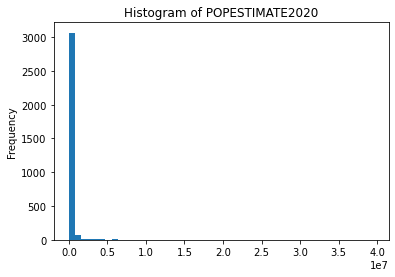

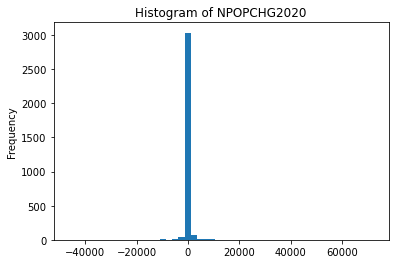

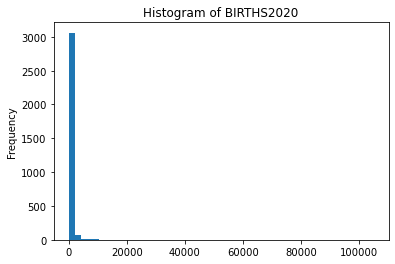

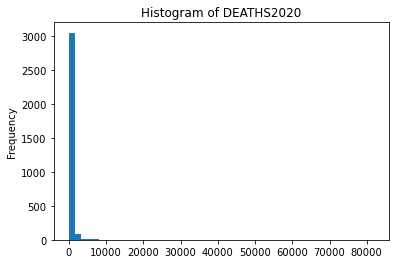

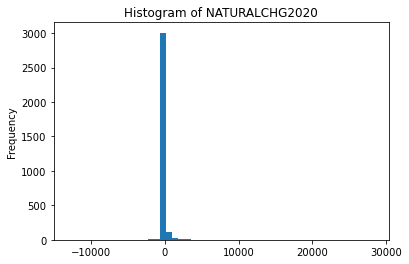

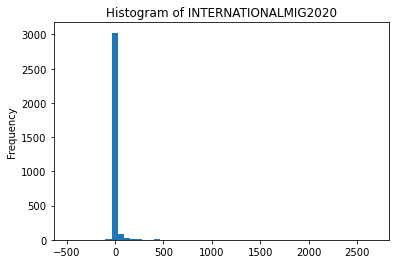

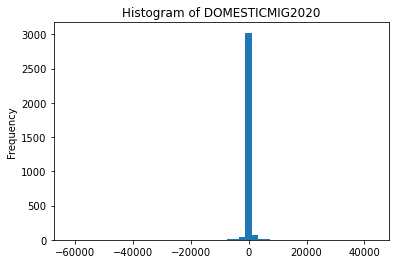

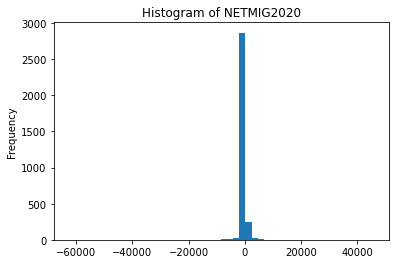

In [12]:
for i in range(len(population_subset.columns)-2):
    i += 2
    population_subset[population_subset.columns[i]].plot.hist(bins=50)
    plt.title(f'Histogram of {population_subset.columns[i]}')
    plt.show()

There are no weird values such as Missing, NaN, Not Available

## 3. Key columns

In [13]:
population_subset.rename(columns={"STNAME": "STATE", "CTYNAME": "COUNTY"}, inplace=True)
population_subset = population_subset.set_index(['STATE','COUNTY'])

In [14]:
population_subset.head()

POPESTIMATE2020  NPOPCHG2020  BIRTHS2020  DEATHS2020  \
STATE   COUNTY                                                                 
Alabama Alabama                 5024803          524       13410       16148   
        Autauga County            58877           72         143         168   
        Baldwin County           233140         1373         527         661   
        Barbour County            25180          -43          64         109   
        Bibb County               22223          -70          62          90   

                        NATURALCHG2020  INTERNATIONALMIG2020  DOMESTICMIG2020  \
STATE   COUNTY                                                                  
Alabama Alabama                  -2738                    -2             3339   
        Autauga County             -25                     0               97   
        Baldwin County            -134                    -1             1516   
        Barbour County             -45                     0                3   
        Bibb County                -28                     0              -42   

                        NETMIG2020  
STATE   COUNTY                      
Alabama Alabama               3337  
        Autauga County          97  
        Baldwin County        1515  
        Barbour County           3  
        Bibb County            -42

## B. Unemployment

In [15]:
unemployment.head()

,FIPS_code,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2000,Employed_2000,Unemployed_2000,Unemployment_rate_2000,...,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Civilian_labor_force_2021,Employed_2021,Unemployed_2021,Unemployment_rate_2021,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,0,US,United States,NaN,NaN,NaN,"142,601,576","136,904,853","5,696,723",4.0,...,"161,207,103","148,183,367","13,023,736",8.1,"161,758,337","153,099,687","8,658,650",5.4,"67,340",NaN
1,1000,AL,Alabama,NaN,NaN,NaN,"2,147,173","2,047,731","99,442",4.6,...,"2,268,309","2,121,149","147,160",6.5,"2,246,993","2,169,721","77,272",3.4,"53,958",100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,"21,861","20,971",890,4.1,...,"26,405","24,985","1,420",5.4,"26,341","25,599",742,2.8,"67,565",125.2
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,"69,979","67,370","2,609",3.7,...,"98,910","92,751","6,159",6.2,"99,427","96,481","2,946",3.0,"71,135",131.8
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,"11,449","10,812",637,5.6,...,"8,680","8,004",676,7.8,"8,197","7,728",469,5.7,"38,866",72.0


<h3> 1. Subsetting the dataset: keeping columns of interest </h3> 

In [16]:
unemployment_subset = unemployment[['State', 'Area_name', 'FIPS_code', 'Civilian_labor_force_2020',
                                   'Employed_2020', 'Unemployed_2020', 'Unemployment_rate_2020',
                                   'Median_Household_Income_2020', 
                                    'Med_HH_Income_Percent_of_State_Total_2020']]
unemployment_subset.head()

,State,Area_name,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,US,United States,0,"161,207,103","148,183,367","13,023,736",8.1,"67,340",NaN
1,AL,Alabama,1000,"2,268,309","2,121,149","147,160",6.5,"53,958",100.0
2,AL,"Autauga County, AL",1001,"26,405","24,985","1,420",5.4,"67,565",125.2
3,AL,"Baldwin County, AL",1003,"98,910","92,751","6,159",6.2,"71,135",131.8
4,AL,"Barbour County, AL",1005,"8,680","8,004",676,7.8,"38,866",72.0


In [17]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Source: https://gist.github.com/rogerallen/1583593

In [18]:
us_abbrev_swap = {v: k for k, v in us_state_to_abbrev.items()}
us_abbrev_swap

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VT': 'Vermont',
 'VA': 'Virginia',
 'WA': 'Washington',
 'WV': 'West Virginia',
 'WI': 'Wisconsin',
 'WY': 'Wyoming',
 'DC': 'District of Columbia

In [19]:
# Making a copy of the dataset, preparing for state value mapping
unemployment_rename = unemployment_subset.copy()

In [20]:
# Non-exhaustive Mapping
unemployment_rename['State'] = unemployment_subset['State'].map(us_abbrev_swap).fillna(unemployment_subset['State'])

In [21]:
unemployment_rename.head()
# The values for state has changed

,State,Area_name,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,US,United States,0,"161,207,103","148,183,367","13,023,736",8.1,"67,340",NaN
1,Alabama,Alabama,1000,"2,268,309","2,121,149","147,160",6.5,"53,958",100.0
2,Alabama,"Autauga County, AL",1001,"26,405","24,985","1,420",5.4,"67,565",125.2
3,Alabama,"Baldwin County, AL",1003,"98,910","92,751","6,159",6.2,"71,135",131.8
4,Alabama,"Barbour County, AL",1005,"8,680","8,004",676,7.8,"38,866",72.0


In [22]:
unemployment_rename['COUNTY'] = ''
unemployment_rename.head()

,State,Area_name,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,COUNTY
0,US,United States,0,"161,207,103","148,183,367","13,023,736",8.1,"67,340",NaN,
1,Alabama,Alabama,1000,"2,268,309","2,121,149","147,160",6.5,"53,958",100.0,
2,Alabama,"Autauga County, AL",1001,"26,405","24,985","1,420",5.4,"67,565",125.2,
3,Alabama,"Baldwin County, AL",1003,"98,910","92,751","6,159",6.2,"71,135",131.8,
4,Alabama,"Barbour County, AL",1005,"8,680","8,004",676,7.8,"38,866",72.0,


In [23]:
for i in range(unemployment_rename.shape[0]):
    unemployment_rename['COUNTY'][i] = unemployment_rename['Area_name'][i].split(",")[0]

C:\Users\Patrick\AppData\Local\Temp/ipykernel_35656/638578430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment_rename['COUNTY'][i] = unemployment_rename['Area_name'][i].split(",")[0]


In [24]:
unemployment_rename.head()

,State,Area_name,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,COUNTY
0,US,United States,0,"161,207,103","148,183,367","13,023,736",8.1,"67,340",NaN,United States
1,Alabama,Alabama,1000,"2,268,309","2,121,149","147,160",6.5,"53,958",100.0,Alabama
2,Alabama,"Autauga County, AL",1001,"26,405","24,985","1,420",5.4,"67,565",125.2,Autauga County
3,Alabama,"Baldwin County, AL",1003,"98,910","92,751","6,159",6.2,"71,135",131.8,Baldwin County
4,Alabama,"Barbour County, AL",1005,"8,680","8,004",676,7.8,"38,866",72.0,Barbour County


In [25]:
unemployment_final = unemployment_rename[['State', 'COUNTY', 'FIPS_code', 'Civilian_labor_force_2020',
                                   'Employed_2020', 'Unemployed_2020', 'Unemployment_rate_2020',
                                   'Median_Household_Income_2020', 
                                    'Med_HH_Income_Percent_of_State_Total_2020']]
unemployment_final.rename(columns={"State": "STATE"}, inplace=True)
unemployment_final.head()

D:\Learnings\Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,STATE,COUNTY,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,US,United States,0,"161,207,103","148,183,367","13,023,736",8.1,"67,340",NaN
1,Alabama,Alabama,1000,"2,268,309","2,121,149","147,160",6.5,"53,958",100.0
2,Alabama,Autauga County,1001,"26,405","24,985","1,420",5.4,"67,565",125.2
3,Alabama,Baldwin County,1003,"98,910","92,751","6,159",6.2,"71,135",131.8
4,Alabama,Barbour County,1005,"8,680","8,004",676,7.8,"38,866",72.0


<h3> 2. Examining missing values, duplicates, and outliers </h3> 

<b> Missing Values Imputation: </b>

In [26]:
for i in range(3,unemployment_final.shape[1]):
    for n in range(unemployment_final.shape[0]):
        if type(unemployment_final.iloc[n,i]) == str:
            unemployment_final.iloc[n,i] = int(unemployment_final.iloc[n,i].replace(',', ''))

D:\Learnings\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [27]:
unemployment_final

,STATE,COUNTY,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,US,United States,0,161207103,148183367,13023736,8.1,67340,NaN
1,Alabama,Alabama,1000,2268309,2121149,147160,6.5,53958,100.0
2,Alabama,Autauga County,1001,26405,24985,1420,5.4,67565,125.2
3,Alabama,Baldwin County,1003,98910,92751,6159,6.2,71135,131.8
4,Alabama,Barbour County,1005,8680,8004,676,7.8,38866,72.0
...,...,...,...,...,...,...,...,...,...
3272,Puerto Rico,Vega Baja Municipio,72145,NaN,NaN,NaN,NaN,NaN,NaN
3273,Puerto Rico,Vieques Municipio,72147,NaN,NaN,NaN,NaN,NaN,NaN
3274,Puerto Rico,Villalba Municipio,72149,NaN,NaN,NaN,NaN,NaN,NaN
3275,Puerto Rico,Yabucoa Municipio,72151,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# There is a missing value in the first row. This dataset obviously contains missing values
# mean imputation is not appropriate, as there are national and state values in the rows
# We will impute with median values

for i in range(3,unemployment_final.shape[1]):
    unemployment_final.iloc[:,i].fillna(unemployment_final.iloc[:,i].median(), inplace = True)

In [29]:
unemployment_final.head()

,STATE,COUNTY,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,US,United States,0,161207103.0,148183367.0,13023736.0,8.1,67340.0,87.8
1,Alabama,Alabama,1000,2268309.0,2121149.0,147160.0,6.5,53958.0,100.0
2,Alabama,Autauga County,1001,26405.0,24985.0,1420.0,5.4,67565.0,125.2
3,Alabama,Baldwin County,1003,98910.0,92751.0,6159.0,6.2,71135.0,131.8
4,Alabama,Barbour County,1005,8680.0,8004.0,676.0,7.8,38866.0,72.0


In [30]:
unemployment_final.isna().sum()

STATE                                        0
COUNTY                                       0
FIPS_code                                    0
Civilian_labor_force_2020                    0
Employed_2020                                0
Unemployed_2020                              0
Unemployment_rate_2020                       0
Median_Household_Income_2020                 0
Med_HH_Income_Percent_of_State_Total_2020    0
dtype: int64

<b> Duplicates: </b>

In [31]:
duplicate = unemployment_final[unemployment_final.duplicated()]
duplicate

,STATE,COUNTY,FIPS_code,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020


There are no duplicates

<b> Outliers: </b>

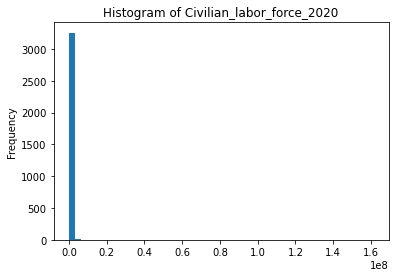

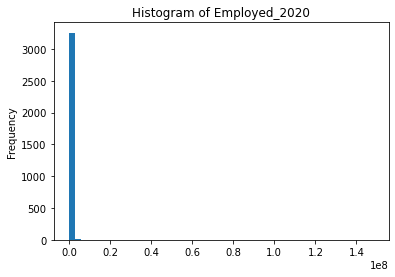

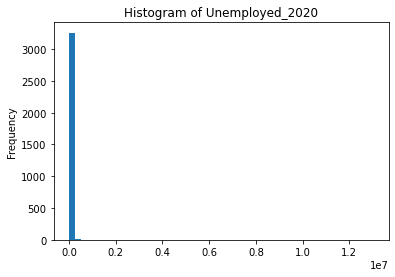

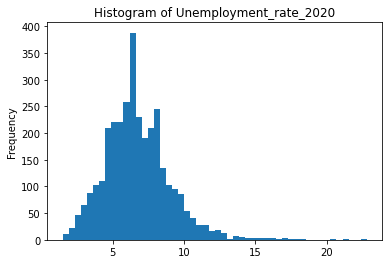

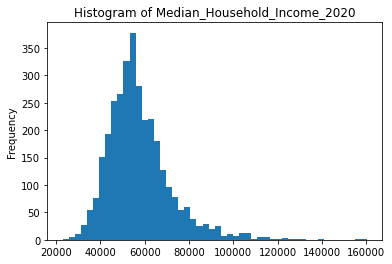

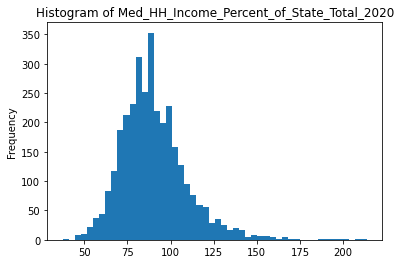

In [32]:
for i in range(len(unemployment_final.columns)-3):
    i += 3
    unemployment_final[unemployment_final.columns[i]].plot.hist(bins=50)
    plt.title(f'Histogram of {unemployment_final.columns[i]}')
    plt.show()

## 3. Indexing

In [33]:
unemployment_final = unemployment_final.set_index(['STATE','COUNTY', 'FIPS_code'])

In [34]:
unemployment_final.head()

Civilian_labor_force_2020  Employed_2020  \
STATE   COUNTY         FIPS_code                                             
US      United States  0                        161207103.0    148183367.0   
Alabama Alabama        1000                       2268309.0      2121149.0   
        Autauga County 1001                         26405.0        24985.0   
        Baldwin County 1003                         98910.0        92751.0   
        Barbour County 1005                          8680.0         8004.0   

                                  Unemployed_2020  Unemployment_rate_2020  \
STATE   COUNTY         FIPS_code                                            
US      United States  0               13023736.0                     8.1   
Alabama Alabama        1000              147160.0                     6.5   
        Autauga County 1001                1420.0                     5.4   
        Baldwin County 1003                6159.0                     6.2   
        Barbour County 1005                 676.0                     7.8   

                                  Median_Household_Income_2020  \
STATE   COUNTY         FIPS_code                                 
US      United States  0                               67340.0   
Alabama Alabama        1000                            53958.0   
        Autauga County 1001                            67565.0   
        Baldwin County 1003                            71135.0   
        Barbour County 1005                            38866.0   

                                  Med_HH_Income_Percent_of_State_Total_2020  
STATE   COUNTY         FIPS_code                                             
US      United States  0                                               87.8  
Alabama Alabama        1000                                           100.0  
        Autauga County 1001                                           125.2  
        Baldwin County 1003                                           131.8  
        Barbour County 1005                                            72.0

## C. Disaster

<h3> 1. Subsetting the dataset: keeping columns of interest </h3> 

In [35]:
disaster_subset = disaster[['state', 'declaration_date', 'incident_type', 'fips', 'designated_area','id']]
disaster_subset

,state,declaration_date,incident_type,fips,designated_area,id
0,GA,1953-05-02T00:00:00Z,Tornado,13000,Statewide,8f8b4a86-847f-422c-b2a3-bbdb2f2ee9d7
1,TX,1953-05-15T00:00:00Z,Tornado,48000,Statewide,4926ca15-ee98-4d43-9636-4c3e4d1308d2
2,LA,1953-05-29T00:00:00Z,Flood,22000,Statewide,5c899b70-3999-47c0-80c7-e5cb8908a048
3,MI,1953-06-02T00:00:00Z,Tornado,26000,Statewide,8f69798b-4084-41b9-a389-f0c51ebac066
4,MT,1953-06-06T00:00:00Z,Flood,30000,Statewide,cc3997c1-06bc-43d8-a3cc-3696a73637f1
...,...,...,...,...,...,...
63761,NY,2022-11-20T00:00:00Z,Winter Storm,36049,Lewis (County),a590e93c-b1d1-417f-80a4-2342d0cb9aa6
63762,NY,2022-11-20T00:00:00Z,Winter Storm,36045,Jefferson (County),a17e743d-9154-4196-874f-dadb61d8e088
63763,NY,2022-11-20T00:00:00Z,Winter Storm,36063,Niagara (County),12f89d35-0361-4743-aff5-cfab6d4d8691
63764,NY,2022-11-20T00:00:00Z,Winter Storm,36065,Oneida (County),86f11cd6-f45a-47fb-8909-e818f6fe2de7


In [36]:
disaster_rename = disaster_subset.copy()

In [37]:
# Non-exhaustive Mapping
disaster_rename['state'] = disaster_subset['state'].map(us_abbrev_swap).fillna(disaster_subset['state'])

In [38]:
# The state names have been changed
disaster_rename.head()

,state,declaration_date,incident_type,fips,designated_area,id
0,Georgia,1953-05-02T00:00:00Z,Tornado,13000,Statewide,8f8b4a86-847f-422c-b2a3-bbdb2f2ee9d7
1,Texas,1953-05-15T00:00:00Z,Tornado,48000,Statewide,4926ca15-ee98-4d43-9636-4c3e4d1308d2
2,Louisiana,1953-05-29T00:00:00Z,Flood,22000,Statewide,5c899b70-3999-47c0-80c7-e5cb8908a048
3,Michigan,1953-06-02T00:00:00Z,Tornado,26000,Statewide,8f69798b-4084-41b9-a389-f0c51ebac066
4,Montana,1953-06-06T00:00:00Z,Flood,30000,Statewide,cc3997c1-06bc-43d8-a3cc-3696a73637f1


In [39]:
# We are only interested in 2020 data
disaster_rename["declaration_date"] = pd.to_datetime(disaster_rename["declaration_date"])
disaster_rename["year"] = disaster_rename["declaration_date"].dt.year
disaster_rename.head()

,state,declaration_date,incident_type,fips,designated_area,id,year
0,Georgia,1953-05-02 00:00:00+00:00,Tornado,13000,Statewide,8f8b4a86-847f-422c-b2a3-bbdb2f2ee9d7,1953
1,Texas,1953-05-15 00:00:00+00:00,Tornado,48000,Statewide,4926ca15-ee98-4d43-9636-4c3e4d1308d2,1953
2,Louisiana,1953-05-29 00:00:00+00:00,Flood,22000,Statewide,5c899b70-3999-47c0-80c7-e5cb8908a048,1953
3,Michigan,1953-06-02 00:00:00+00:00,Tornado,26000,Statewide,8f69798b-4084-41b9-a389-f0c51ebac066,1953
4,Montana,1953-06-06 00:00:00+00:00,Flood,30000,Statewide,cc3997c1-06bc-43d8-a3cc-3696a73637f1,1953


In [40]:
disaster_final = disaster_rename[disaster_rename['year'] == 2020]
disaster_final.rename(columns={"state": "STATE", "fips":"FIPS_code"}, inplace=True)
disaster_final = disaster_final[['STATE', 'FIPS_code', 'incident_type', 'designated_area','id']]

D:\Learnings\Anaconda\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<h3> 2. Examining missing values, duplicates, and outliers </h3> 

<b> Missing Values: </b>

In [41]:
disaster_final.isna().sum()
# There are no missing values in this dataset

STATE              0
FIPS_code          0
incident_type      0
designated_area    0
id                 0
dtype: int64

<b> Duplicates</b>:

In [42]:
duplicate = disaster_final[disaster_final.duplicated()]
duplicate

,STATE,FIPS_code,incident_type,designated_area,id


There are no duplicates

<b> Outliers </b>

In [43]:
disaster_final.incident_type.value_counts()

Biological          7855
Hurricane           1133
Severe Storm         257
Fire                 173
Earthquake           114
Coastal Storm         64
Flood                 61
Severe Ice Storm      29
Tornado               19
Dam/Levee Break        7
Name: incident_type, dtype: int64

There is no unusual inputs such as 'Missing' or 'NA'. There is no outliers.

## 3. Setting indexes

In [44]:
disaster_final =disaster_final.set_index(['STATE','FIPS_code'])

In [45]:
disaster_final.head()

incident_type      designated_area  \
STATE       FIPS_code                                      
Puerto Rico 72013        Earthquake  Arecibo (Municipio)   
            72015        Earthquake   Arroyo (Municipio)   
            72035        Earthquake    Cayey (Municipio)   
            72054        Earthquake  Florida (Municipio)   
            72071        Earthquake  Isabela (Municipio)   

                                                         id  
STATE       FIPS_code                                        
Puerto Rico 72013      6d47c098-c77c-4889-a67b-7e4f0ef39c54  
            72015      ab35fdf5-728e-4f93-b568-12cd9ca9e24f  
            72035      7af9a2df-145e-4748-9b98-468bde24745b  
            72054      551bdff6-864f-46b1-8d2a-ee364d12c0f8  
            72071      82180c81-9528-4402-bd98-9124b396d947

# Merging Data

First, let's examine the completed datasets

In [46]:
population_subset.head()

POPESTIMATE2020  NPOPCHG2020  BIRTHS2020  DEATHS2020  \
STATE   COUNTY                                                                 
Alabama Alabama                 5024803          524       13410       16148   
        Autauga County            58877           72         143         168   
        Baldwin County           233140         1373         527         661   
        Barbour County            25180          -43          64         109   
        Bibb County               22223          -70          62          90   

                        NATURALCHG2020  INTERNATIONALMIG2020  DOMESTICMIG2020  \
STATE   COUNTY                                                                  
Alabama Alabama                  -2738                    -2             3339   
        Autauga County             -25                     0               97   
        Baldwin County            -134                    -1             1516   
        Barbour County             -45                     0                3   
        Bibb County                -28                     0              -42   

                        NETMIG2020  
STATE   COUNTY                      
Alabama Alabama               3337  
        Autauga County          97  
        Baldwin County        1515  
        Barbour County           3  
        Bibb County            -42

In [47]:
unemployment_final.head()

Civilian_labor_force_2020  Employed_2020  \
STATE   COUNTY         FIPS_code                                             
US      United States  0                        161207103.0    148183367.0   
Alabama Alabama        1000                       2268309.0      2121149.0   
        Autauga County 1001                         26405.0        24985.0   
        Baldwin County 1003                         98910.0        92751.0   
        Barbour County 1005                          8680.0         8004.0   

                                  Unemployed_2020  Unemployment_rate_2020  \
STATE   COUNTY         FIPS_code                                            
US      United States  0               13023736.0                     8.1   
Alabama Alabama        1000              147160.0                     6.5   
        Autauga County 1001                1420.0                     5.4   
        Baldwin County 1003                6159.0                     6.2   
        Barbour County 1005                 676.0                     7.8   

                                  Median_Household_Income_2020  \
STATE   COUNTY         FIPS_code                                 
US      United States  0                               67340.0   
Alabama Alabama        1000                            53958.0   
        Autauga County 1001                            67565.0   
        Baldwin County 1003                            71135.0   
        Barbour County 1005                            38866.0   

                                  Med_HH_Income_Percent_of_State_Total_2020  
STATE   COUNTY         FIPS_code                                             
US      United States  0                                               87.8  
Alabama Alabama        1000                                           100.0  
        Autauga County 1001                                           125.2  
        Baldwin County 1003                                           131.8  
        Barbour County 1005                                            72.0

In [48]:
disaster_final.head()

incident_type      designated_area  \
STATE       FIPS_code                                      
Puerto Rico 72013        Earthquake  Arecibo (Municipio)   
            72015        Earthquake   Arroyo (Municipio)   
            72035        Earthquake    Cayey (Municipio)   
            72054        Earthquake  Florida (Municipio)   
            72071        Earthquake  Isabela (Municipio)   

                                                         id  
STATE       FIPS_code                                        
Puerto Rico 72013      6d47c098-c77c-4889-a67b-7e4f0ef39c54  
            72015      ab35fdf5-728e-4f93-b568-12cd9ca9e24f  
            72035      7af9a2df-145e-4748-9b98-468bde24745b  
            72054      551bdff6-864f-46b1-8d2a-ee364d12c0f8  
            72071      82180c81-9528-4402-bd98-9124b396d947

In [49]:
df1 = pd.merge(population_subset, unemployment_final, left_index=True, right_index=True)
df1.head()

POPESTIMATE2020  NPOPCHG2020  BIRTHS2020  \
STATE   COUNTY         FIPS_code                                             
Alabama Alabama        1000               5024803          524       13410   
        Autauga County 1001                 58877           72         143   
        Baldwin County 1003                233140         1373         527   
        Barbour County 1005                 25180          -43          64   
        Bibb County    1007                 22223          -70          62   

                                  DEATHS2020  NATURALCHG2020  \
STATE   COUNTY         FIPS_code                               
Alabama Alabama        1000            16148           -2738   
        Autauga County 1001              168             -25   
        Baldwin County 1003              661            -134   
        Barbour County 1005              109             -45   
        Bibb County    1007               90             -28   

                                  INTERNATIONALMIG2020  DOMESTICMIG2020  \
STATE   COUNTY         FIPS_code                                          
Alabama Alabama        1000                         -2             3339   
        Autauga County 1001                          0               97   
        Baldwin County 1003                         -1             1516   
        Barbour County 1005                          0                3   
        Bibb County    1007                          0              -42   

                                  NETMIG2020  Civilian_labor_force_2020  \
STATE   COUNTY         FIPS_code                                          
Alabama Alabama        1000             3337                  2268309.0   
        Autauga County 1001               97                    26405.0   
        Baldwin County 1003             1515                    98910.0   
        Barbour County 1005                3                     8680.0   
        Bibb County    1007              -42                     8712.0   

                                  Employed_2020  Unemployed_2020  \
STATE   COUNTY         FIPS_code                                   
Alabama Alabama        1000           2121149.0         147160.0   
        Autauga County 1001             24985.0           1420.0   
        Baldwin County 1003             92751.0           6159.0   
        Barbour County 1005              8004.0            676.0   
        Bibb County    1007              8073.0            639.0   

                                  Unemployment_rate_2020  \
STATE   COUNTY         FIPS_code                           
Alabama Alabama        1000                          6.5   
        Autauga County 1001                          5.4   
        Baldwin County 1003                          6.2   
        Barbour County 1005                          7.8   
        Bibb County    1007                          7.3   

                                  Median_Household_Income_2020  \
STATE   COUNTY         FIPS_code                                 
Alabama Alabama        1000                            53958.0   
        Autauga County 1001                            67565.0   
        Baldwin County 1003                            71135.0   
        Barbour County 1005                            38866.0   
        Bibb County    1007                            50907.0   

                                  Med_HH_Income_Percent_of_State_Total_2020  
STATE   COUNTY         FIPS_code                                             
Alabama Alabama        1000                                           100.0  
        Autauga County 1001                                           125.2  
        Baldwin County 1003                                           131.8  
        Barbour County 1005                                            72.0  
        Bibb County    1007                                            94.3

In [50]:
df_master = pd.merge(df1, disaster_final, left_index=True, right_index=True)
df_master.head(20)

POPESTIMATE2020  NPOPCHG2020  BIRTHS2020  \
STATE   FIPS_code COUNTY                                                     
Alabama 1000      Alabama                 5024803          524       13410   
                  Alabama                 5024803          524       13410   
                  Alabama                 5024803          524       13410   
                  Alabama                 5024803          524       13410   
                  Alabama                 5024803          524       13410   
                  Alabama                 5024803          524       13410   
        1001      Autauga County            58877           72         143   
                  Autauga County            58877           72         143   
                  Autauga County            58877           72         143   
                  Autauga County            58877           72         143   
        1003      Baldwin County           233140         1373         527   
                  Baldwin County           233140         1373         527   
                  Baldwin County           233140         1373         527   
                  Baldwin County           233140         1373         527   
        1005      Barbour County            25180          -43          64   
                  Barbour County            25180          -43          64   
                  Barbour County            25180          -43          64   
                  Barbour County            25180          -43          64   
                  Barbour County            25180          -43          64   
        1007      Bibb County               22223          -70          62   

                                  DEATHS2020  NATURALCHG2020  \
STATE   FIPS_code COUNTY                                       
Alabama 1000      Alabama              16148           -2738   
                  Alabama              16148           -2738   
                  Alabama              16148           -2738   
                  Alabama              16148           -2738   
                  Alabama              16148           -2738   
                  Alabama              16148           -2738   
        1001      Autauga County         168             -25   
                  Autauga County         168             -25   
                  Autauga County         168             -25   
                  Autauga County         168             -25   
        1003      Baldwin County         661            -134   
                  Baldwin County         661            -134   
                  Baldwin County         661            -134   
                  Baldwin County         661            -134   
        1005      Barbour County         109             -45   
                  Barbour County         109             -45   
                  Barbour County         109             -45   
                  Barbour County         109             -45   
                  Barbour County         109             -45   
        1007      Bibb County             90             -28   

                                  INTERNATIONALMIG2020  DOMESTICMIG2020  \
STATE   FIPS_code COUNTY                                                  
Alabama 1000      Alabama                           -2             3339   
                  Alabama                           -2             3339   
                  Alabama                           -2             3339   
                  Alabama                           -2             3339   
                  Alabama                           -2             3339   
                  Alabama                           -2             3339   
        1001      Autauga County                     0               97   
                  Autauga County                     0               97   
                  Autauga County                     0               97   
                  Autauga County                     0               97   
        

Now that we have a merged dataset, let's do some analysis to see the relationship between:

a) the movement of population

b) local employment and income

c) disasters in US counties

# ANALYSIS AND INSIGHTS <a id='analysis'></a>


In [51]:
df_master = pd.read_csv(r'C:\Users\Patrick\Desktop\CPSC 4810 Project\df_master.csv')
df_master

,STATE,FIPS_code,COUNTY,POPESTIMATE2020,NPOPCHG2020,BIRTHS2020,DEATHS2020,NATURALCHG2020,INTERNATIONALMIG2020,DOMESTICMIG2020,NETMIG2020,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020,incident_type,designated_area,id
0,Alabama,1000,Alabama,5024803,524,13410,16148,-2738,-2,3339,3337,2268309,2121149,147160,6.5,53958,100.0,Biological,Poarch Band of Creek Indians,12266b3c-32a9-454b-bd78-7e8196a10280
1,Alabama,1000,Alabama,5024803,524,13410,16148,-2738,-2,3339,3337,2268309,2121149,147160,6.5,53958,100.0,Biological,Poarch Band of Creek Indians,c1a7d4e9-27d1-4e3b-9b0c-0359c5e1e39f
2,Alabama,1000,Alabama,5024803,524,13410,16148,-2738,-2,3339,3337,2268309,2121149,147160,6.5,53958,100.0,Biological,Poarch Band of Creek Indians,32efeb61-a4c1-4a4c-afd7-1c70e4052567
3,Alabama,1000,Alabama,5024803,524,13410,16148,-2738,-2,3339,3337,2268309,2121149,147160,6.5,53958,100.0,Biological,MOWA Choctaw (SAIR),8a0bde0a-d910-4f08-b63d-b65b05dae77e
4,Alabama,1000,Alabama,5024803,524,13410,16148,-2738,-2,3339,3337,2268309,2121149,147160,6.5,53958,100.0,Hurricane,Poarch Band of Creek Indians,9591f718-53f7-4c30-9377-fe1472d8730c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,Wyoming,56041,Uinta County,20441,-9,50,49,1,0,-11,-11,9102,8532,570,6.3,71246,105.9,Biological,Uinta (County),0081c89c-5fd5-4c62-9d85-72f087680711
9203,Wyoming,56043,Washakie County,7658,-27,18,32,-14,0,-13,-13,3945,3739,206,5.2,58532,87.0,Biological,Washakie (County),64575f6d-3b6a-434b-9908-dcc638911621
9204,Wyoming,56043,Washakie County,7658,-27,18,32,-14,0,-13,-13,3945,3739,206,5.2,58532,87.0,Biological,Washakie (County),2b7aab2a-e9de-41a8-a290-1ee13680987a
9205,Wyoming,56045,Weston County,6809,-29,16,14,2,0,-31,-31,3789,3645,144,3.8,58901,87.5,Biological,Weston (County),44174fe8-6881-4246-91b8-64f62ff51dc8


With the master dataset listed above, let us narrow it further to reflect only the first value per county, as there are a lot of duplicates, which can affect our analysis and visuals. We will use the master dataset later, when we analyze disasters and incident types. 

Here is the dataset reflecting only the first value per county:

In [52]:
df_condensed = df_master.drop(['designated_area','id','incident_type'], axis=1)
df_condensed_final = df_condensed.drop_duplicates(subset='COUNTY')
df_condensed_final

,STATE,FIPS_code,COUNTY,POPESTIMATE2020,NPOPCHG2020,BIRTHS2020,DEATHS2020,NATURALCHG2020,INTERNATIONALMIG2020,DOMESTICMIG2020,NETMIG2020,Civilian_labor_force_2020,Employed_2020,Unemployed_2020,Unemployment_rate_2020,Median_Household_Income_2020,Med_HH_Income_Percent_of_State_Total_2020
0,Alabama,1000,Alabama,5024803,524,13410,16148,-2738,-2,3339,3337,2268309,2121149,147160,6.5,53958,100.0
6,Alabama,1001,Autauga County,58877,72,143,168,-25,0,97,97,26405,24985,1420,5.4,67565,125.2
10,Alabama,1003,Baldwin County,233140,1373,527,661,-134,-1,1516,1515,98910,92751,6159,6.2,71135,131.8
14,Alabama,1005,Barbour County,25180,-43,64,109,-45,0,3,3,8680,8004,676,7.8,38866,72.0
19,Alabama,1007,Bibb County,22223,-70,62,90,-28,0,-42,-42,8712,8073,639,7.3,50907,94.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,Wyoming,56035,Sublette County,8723,-5,19,19,0,0,-4,-4,4020,3730,290,7.2,82442,122.5
9197,Wyoming,56037,Sweetwater County,42158,-114,112,116,-4,1,-113,-112,20503,18998,1505,7.3,70583,104.9
9201,Wyoming,56041,Uinta County,20441,-9,50,49,1,0,-11,-11,9102,8532,570,6.3,71246,105.9
9203,Wyoming,56043,Washakie County,7658,-27,18,32,-14,0,-13,-13,3945,3739,206,5.2,58532,87.0


We then check if there is a unique value per state:

In [53]:
def unique_val(df, col_name):
    nb_unique_values = len(df_condensed_final.loc[:,col_name].unique())
    nb_rows = df_condensed_final.shape[0]

    if nb_unique_values == nb_rows:
        print("YES:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows", "\n")
    else:
        print("NO:", nb_unique_values, "unique", col_name, "values,", nb_rows, "rows", "\n")

In [54]:
for key, value in df_master.items():
    print("\033[1m", key, "\033[0m")
    unique_val(value, "COUNTY")

 STATE 
YES: 1900 unique COUNTY values, 1900 rows 

 FIPS_code 
YES: 1900 unique COUNTY values, 1900 rows 

 COUNTY 
YES: 1900 unique COUNTY values, 1900 rows 

 POPESTIMATE2020 
YES: 1900 unique COUNTY values, 1900 rows 

 NPOPCHG2020 
YES: 1900 unique COUNTY values, 1900 rows 

 BIRTHS2020 
YES: 1900 unique COUNTY values, 1900 rows 

 DEATHS2020 
YES: 1900 unique COUNTY values, 1900 rows 

 NATURALCHG2020 
YES: 1900 unique COUNTY values, 1900 rows 

 INTERNATIONALMIG2020 
YES: 1900 unique COUNTY values, 1900 rows 

 DOMESTICMIG2020 
YES: 1900 unique COUNTY values, 1900 rows 

 NETMIG2020 
YES: 1900 unique COUNTY values, 1900 rows 

 Civilian_labor_force_2020 
YES: 1900 unique COUNTY values, 1900 rows 

 Employed_2020 
YES: 1900 unique COUNTY values, 1900 rows 

 Unemployed_2020 
YES: 1900 unique COUNTY values, 1900 rows 

 Unemployment_rate_2020 
YES: 1900 unique COUNTY values, 1900 rows 

 Median_Household_Income_2020 
YES: 1900 unique COUNTY values, 1900 rows 

 Med_HH_Income_Perce

Let us now conduct correlation analysis by using a correlation heatmap:

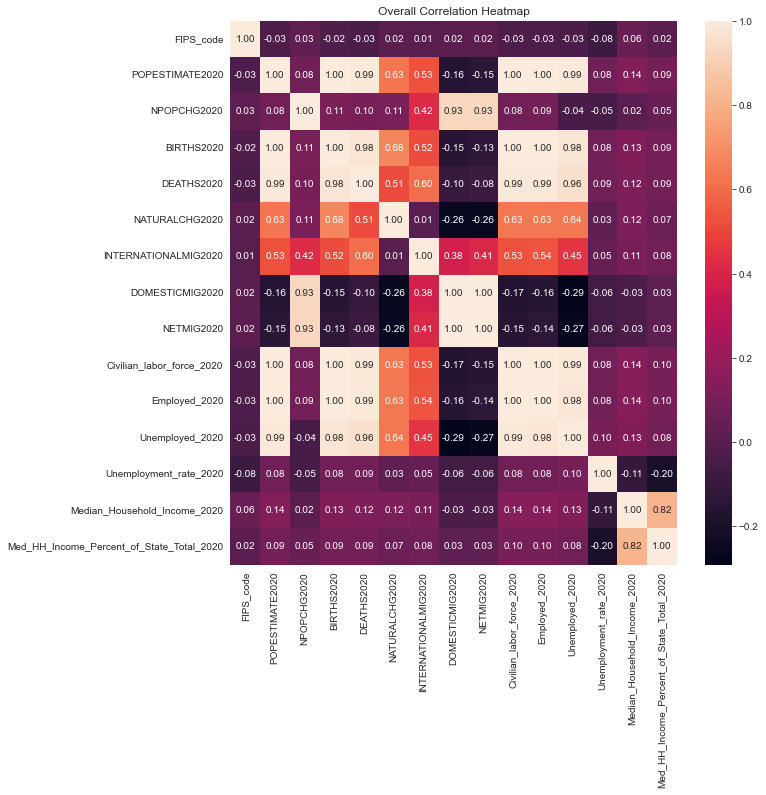

In [60]:
ax = plt.axes()
sns.heatmap(df_condensed_final.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title('Overall Correlation Heatmap')
plt.rcParams["figure.figsize"]=10,10
plt.show()

Based on the correlation heat map above, here are the following observations:

1.) __POPESTIMATE2020 & INTERNATIONALMIG2020__ - This could mean that the higher the population, the more likely that a sizable amount came from international immigrants. It is interesting as when we look at Domestic Migrations, it is more unlikely that there are domestic migrants that constitute the population.

2.) __POPESTIMATE2020 & Deaths__ - This could mean that the higher the population,it naturally follows that there are more deaths. However, we are to find out how many from those deaths died to certain types of incidents. 

3.) __POPESTIMATE2020 & Variables Related to Employment__ - This means that the higher the population, the higher the number that constitutes the labor force. We are to see if this is true for select states. 

4.) __INTERNATIONALMIG2020 & Variables Related to Employment__ - There is a moderately strong correlation, which could mean that there is a sizable amount of international migrants constituting the Civilian Labor Force. 

5.) __INTERNATIONALMIG2020 & DEATHS2020__ - There is a moderate correlation, which could mean that there it is moderately likely that the death count involves a sizable amount of international migrants. This is interesting as domestic migration gives off a very low correlation value (-0.13). 

6.) __NPOPCHG2020 & NETMIG2020__ - It can be noted that the numeric change in population more than likely involves the movement of migrants (international or domestic). 

7.) __POPESTIMATE2020 & Unemployment_Rate_2020__ - There is almost no correlation, which could mean that there are other causes that would lead to unemployment.

# VISUALS<a id='visuals'></a>

Let us first take a look at the overall population estimates per state.

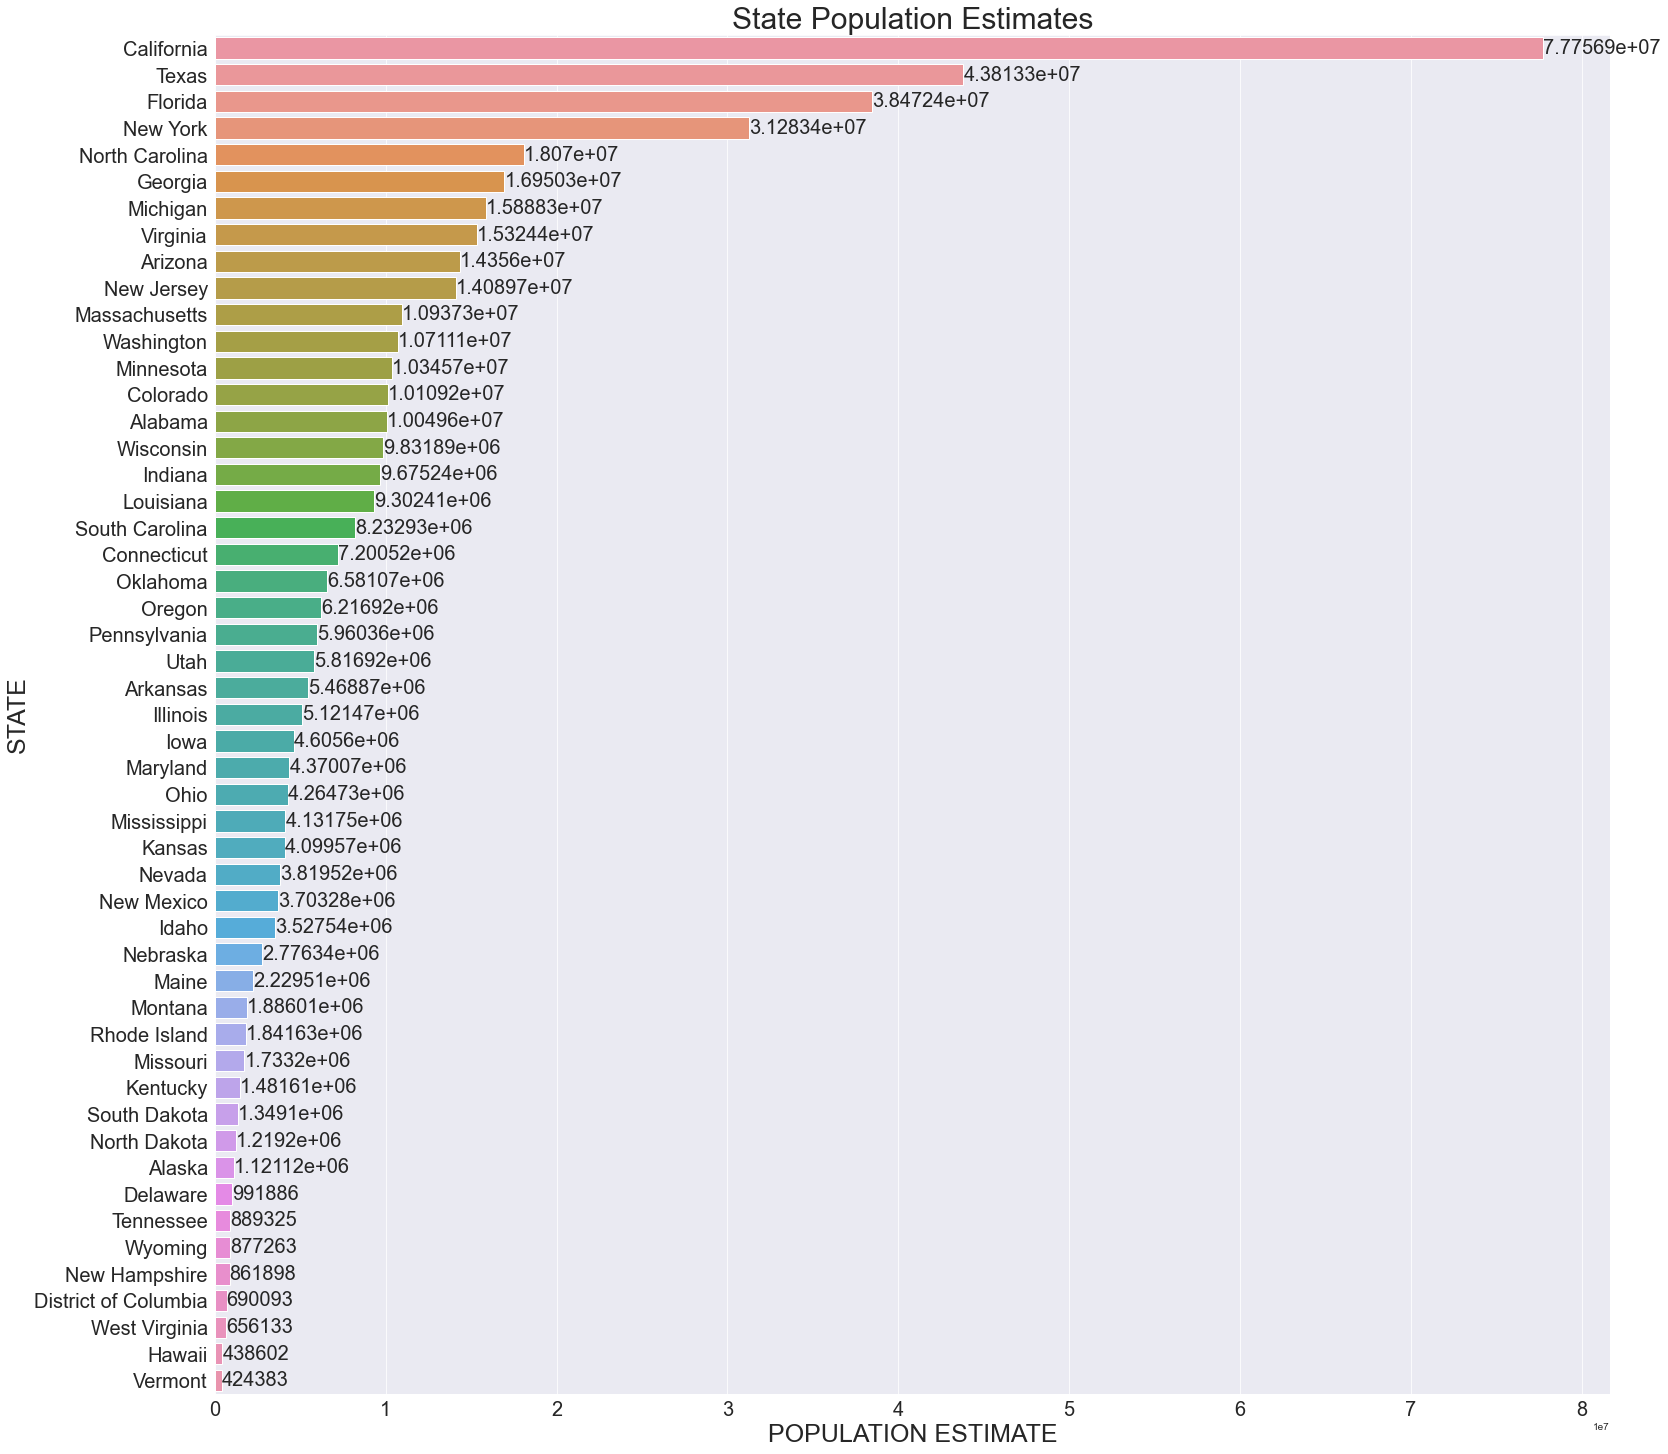

In [58]:
pop_est =df_condensed_final.pivot_table(index = 'STATE', aggfunc = {'POPESTIMATE2020':'sum'} ).reset_index()
sns.set_style('darkgrid')
ax0 = sns.barplot(data=pop_est, x="POPESTIMATE2020", y="STATE",  order=pop_est.sort_values('POPESTIMATE2020',ascending=False).STATE,errwidth=0)
ax0.bar_label(ax0.containers[0], fontsize=20)
ax0.set_title('State Population Estimates', fontsize=30)
plt.rcParams["figure.figsize"]=25,25
plt.xlabel('POPULATION ESTIMATE', fontsize=25)
plt.ylabel('STATE', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Let us then take a look at the states with the highest migrations: 


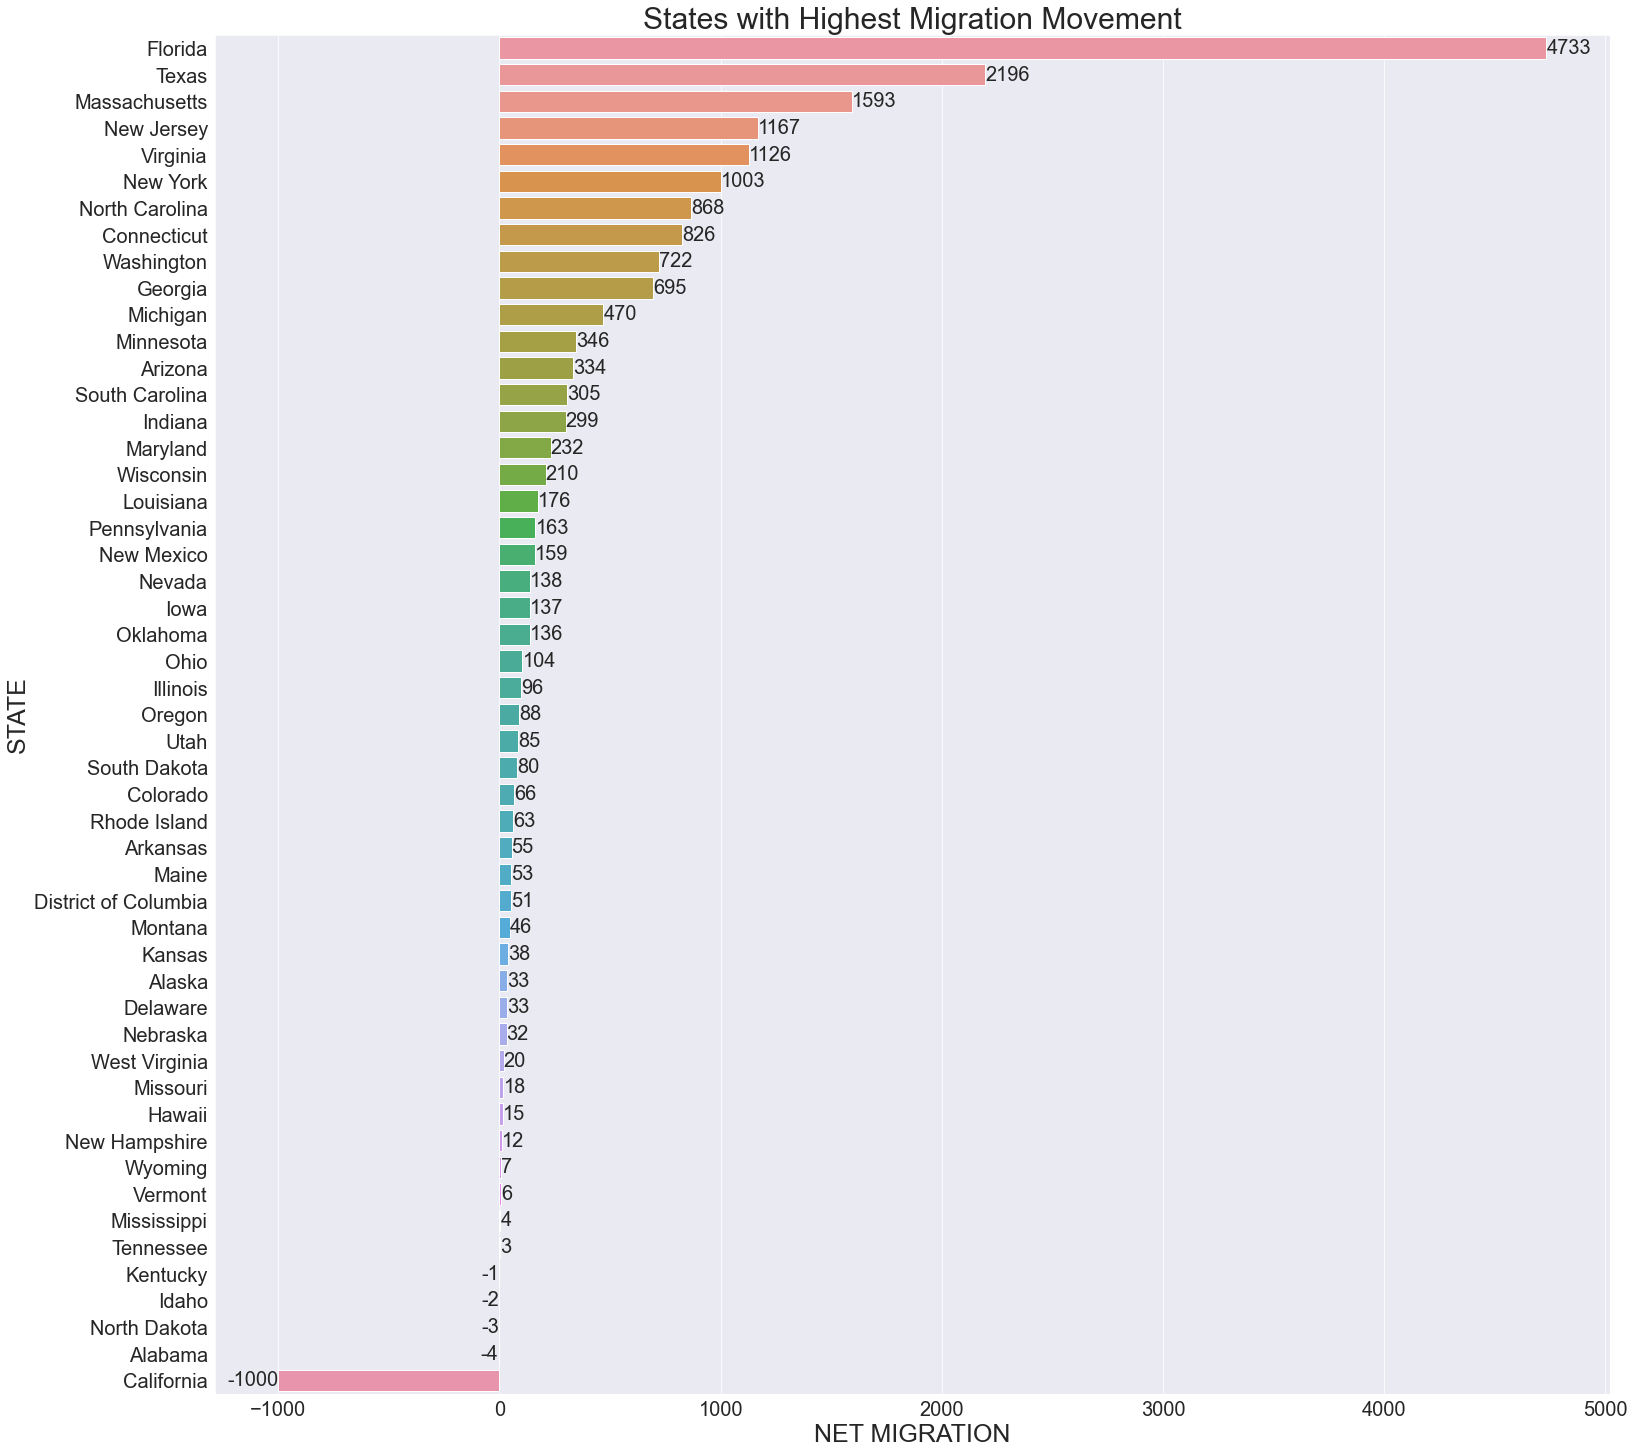

In [82]:
net_mig =df_condensed_final.pivot_table(index = 'STATE', aggfunc = {'INTERNATIONALMIG2020':'sum'} ).reset_index()
ax9 = sns.barplot(data=net_mig, x="INTERNATIONALMIG2020", y="STATE",  order=net_mig.sort_values('INTERNATIONALMIG2020',ascending=False).STATE,errwidth=0)
ax9.bar_label(ax9.containers[0], fontsize=20)
ax9.set_title('States with Highest Migration Movement', fontsize=30)
plt.rcParams["figure.figsize"]=25,25
plt.xlabel('NET MIGRATION', fontsize=25)
plt.ylabel('STATE', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Let us now take a look at what states had the highest employment:

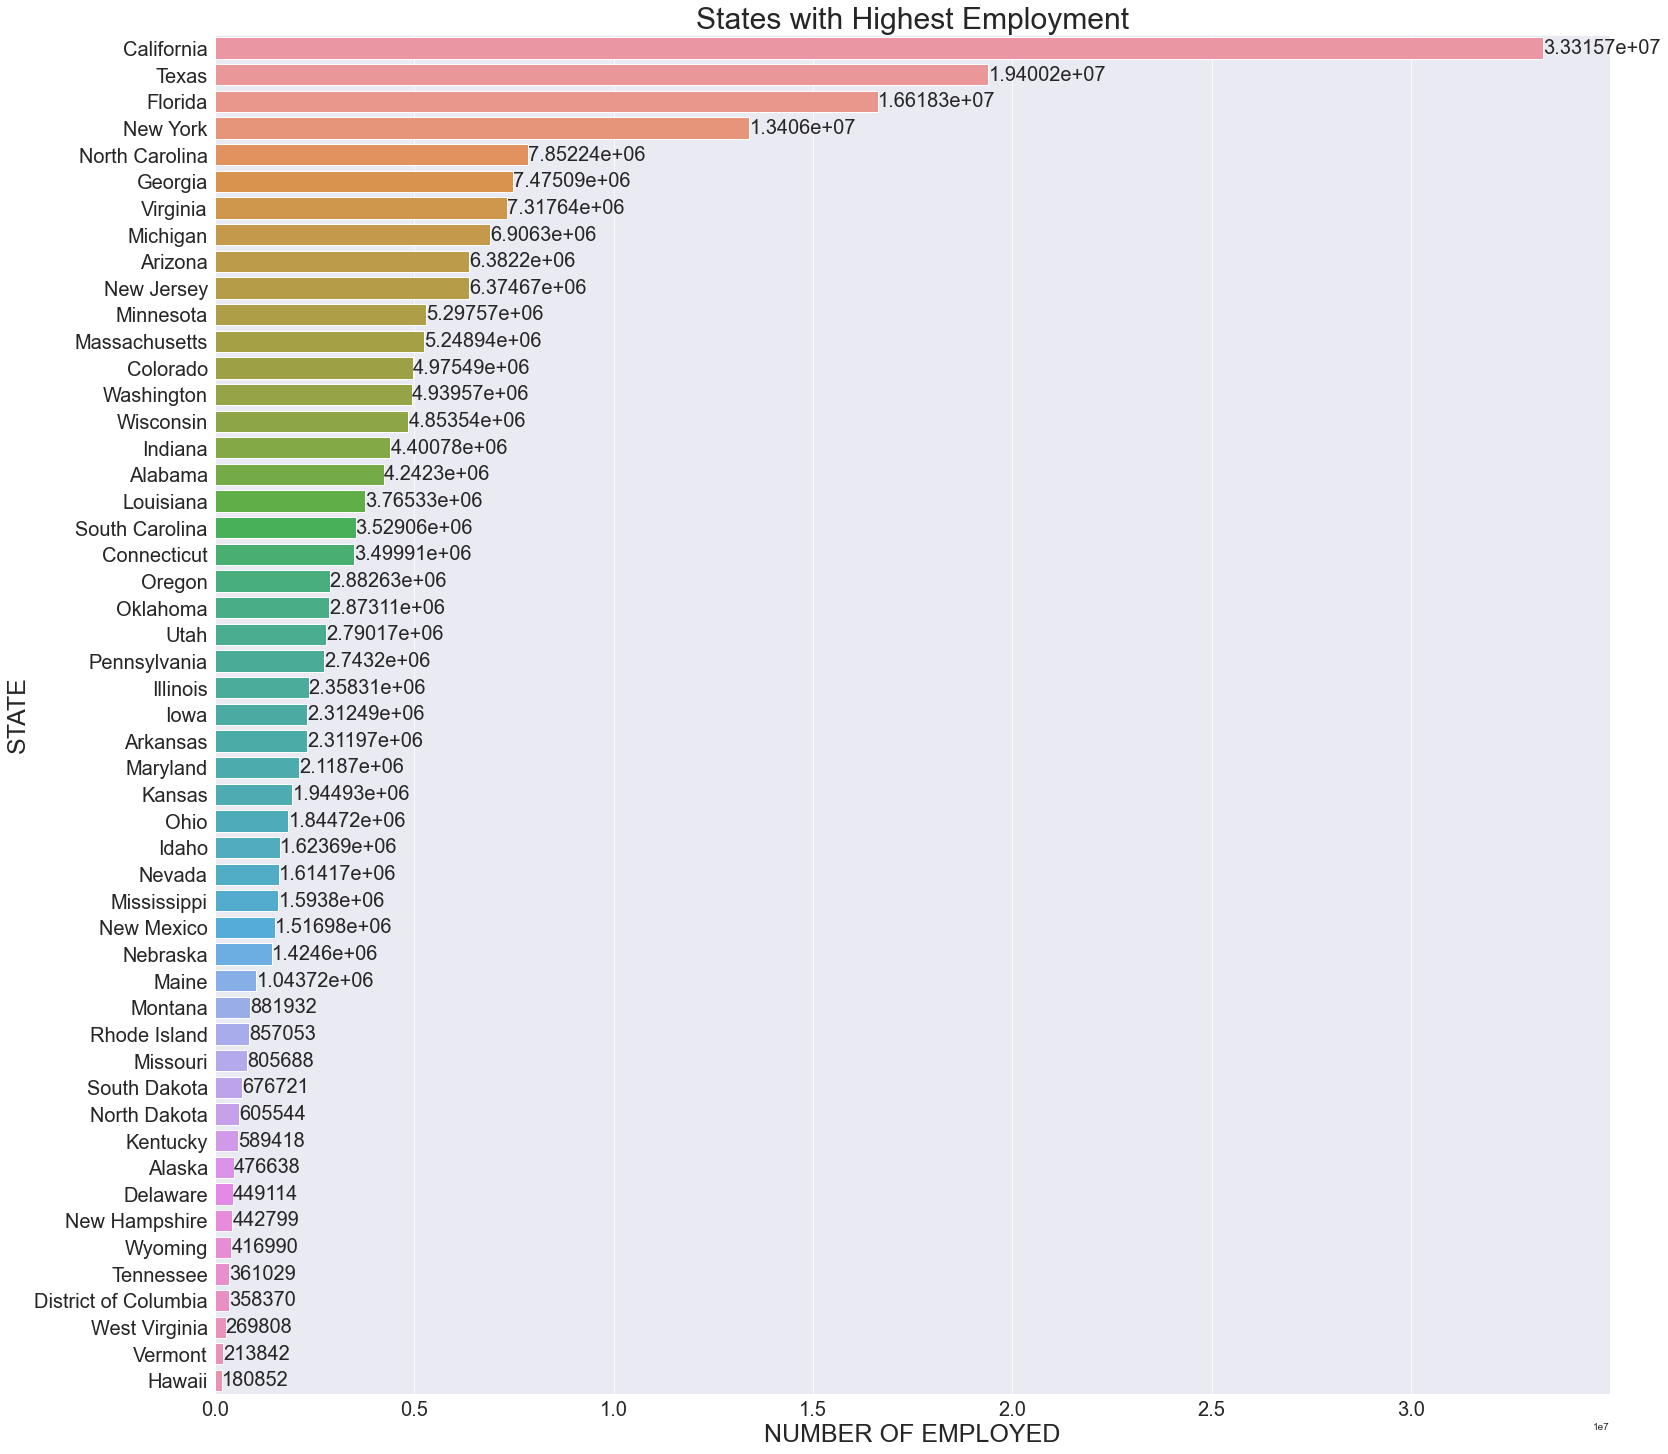

In [86]:
emp = df_condensed_final.pivot_table(index = 'STATE', aggfunc = {'Employed_2020':'sum'} ).reset_index()
ax10 = sns.barplot(data=emp, x="Employed_2020", y="STATE",  
                  order=emp.sort_values('Employed_2020',ascending=False).STATE,errwidth=0)
ax10.bar_label(ax10.containers[0], fontsize=20)
ax10.set_title('States with Highest Employment', fontsize=30)
plt.xlabel('NUMBER OF EMPLOYED', fontsize=25)
plt.ylabel('STATE', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Let us also take a look at the states with the highest median household income: 


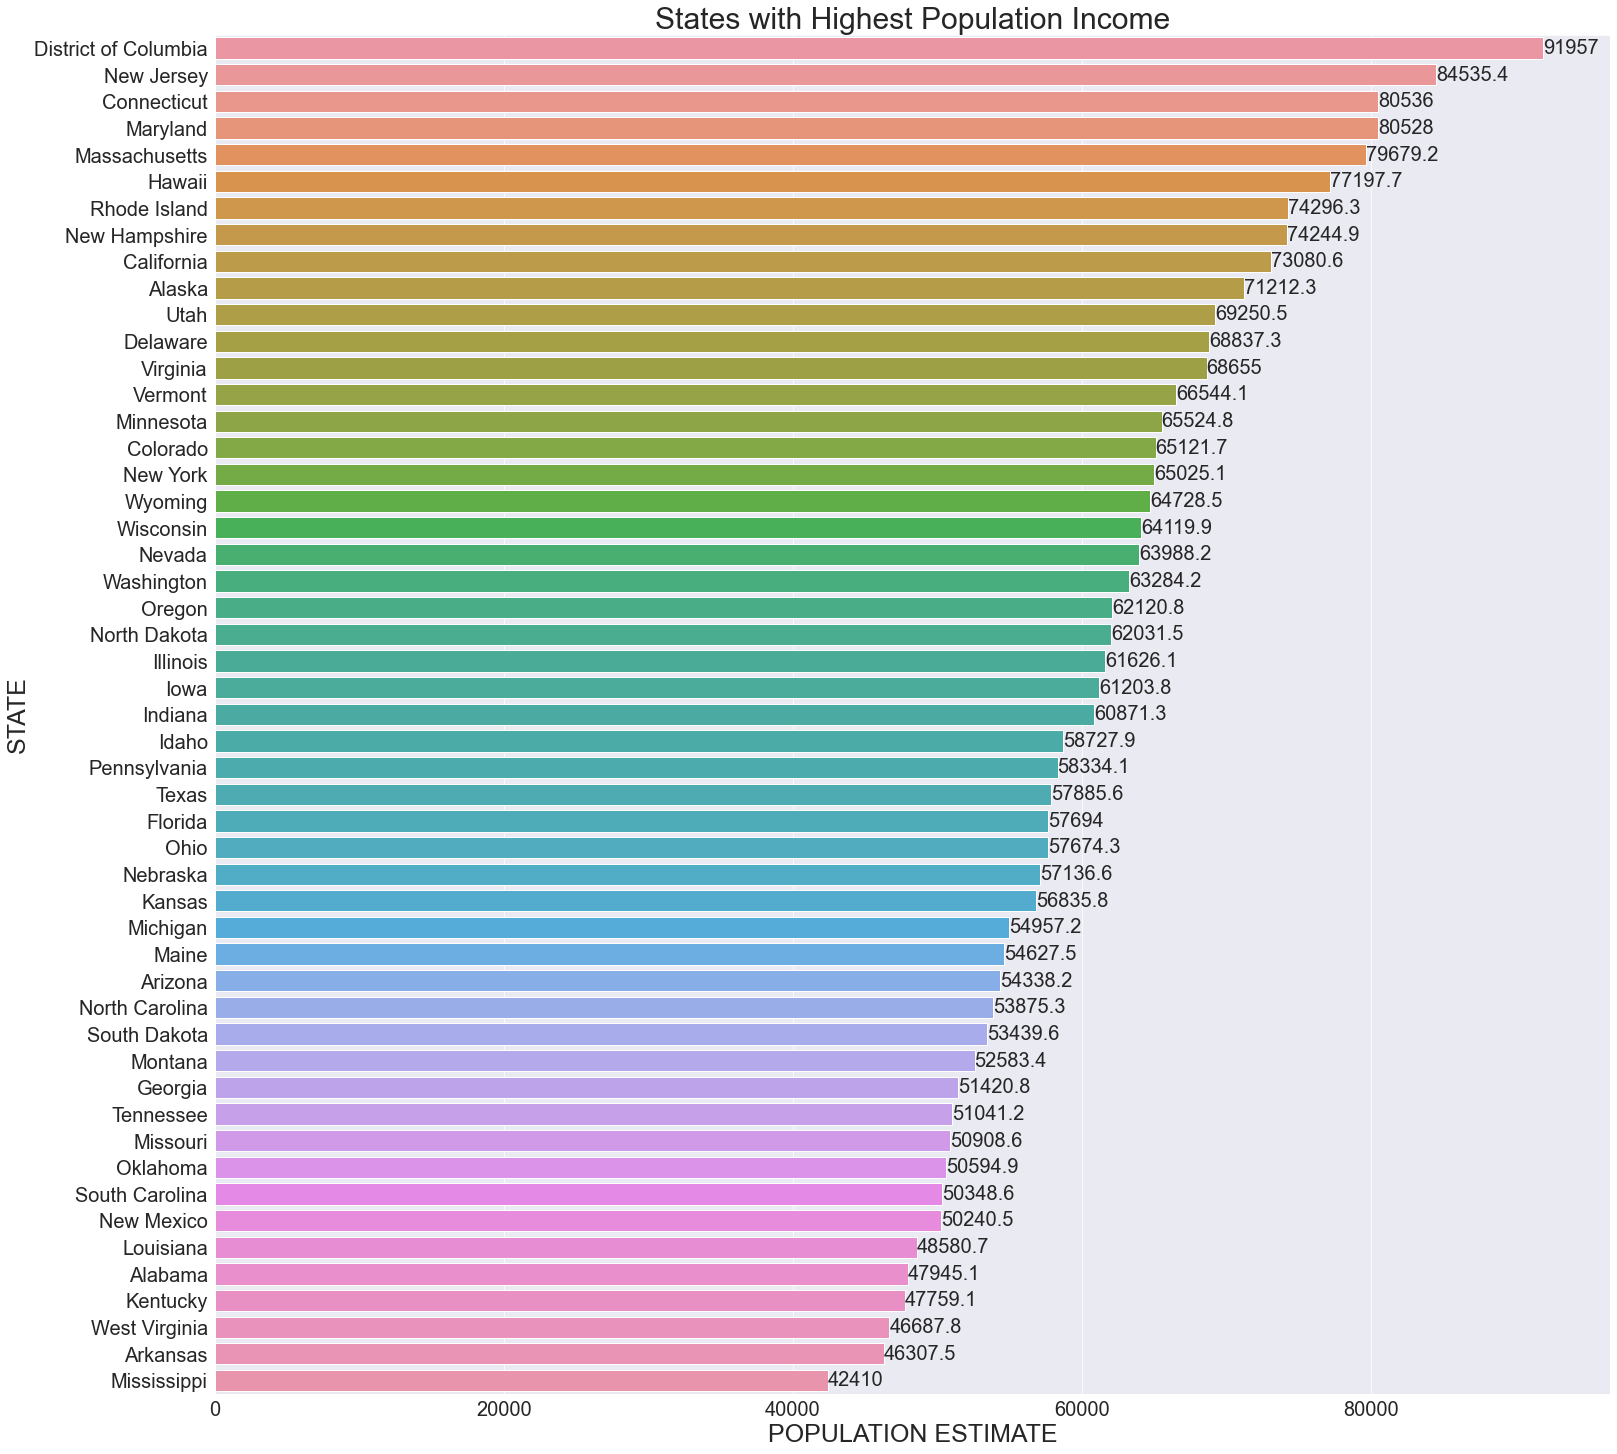

In [65]:
inc = df_condensed_final.pivot_table(index = 'STATE', aggfunc = {'Median_Household_Income_2020':'mean'} ).reset_index()
ax6 = sns.barplot(data=inc, x="Median_Household_Income_2020", y="STATE",  
                  order=inc.sort_values('Median_Household_Income_2020',ascending=False).STATE,errwidth=0)
ax6.bar_label(ax6.containers[0], fontsize=20)
ax6.set_title('States with Highest Population Income', fontsize=30)
plt.xlabel('POPULATION ESTIMATE', fontsize=25)
plt.ylabel('STATE', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

 Something of note here is that the District of Columbia has the highest median income, whilst having one of the lowest employed people. It is also inconsistent with our correlation if we look at it since there is no notable migration movement in the District of Columbia. 
 
 We then look at Florida: it has the highest migration movement, and the 3rd highest population. But when we look at median income, it is right in the middle. 
 
 We can infer here that while there are more opportunities given for these states, it does not necessarily mean that the income gets higher, as there may be higher quality jobs in other states, such is the case for the District of Columbia.

Let us then take a look at the unemployment rates of the states:


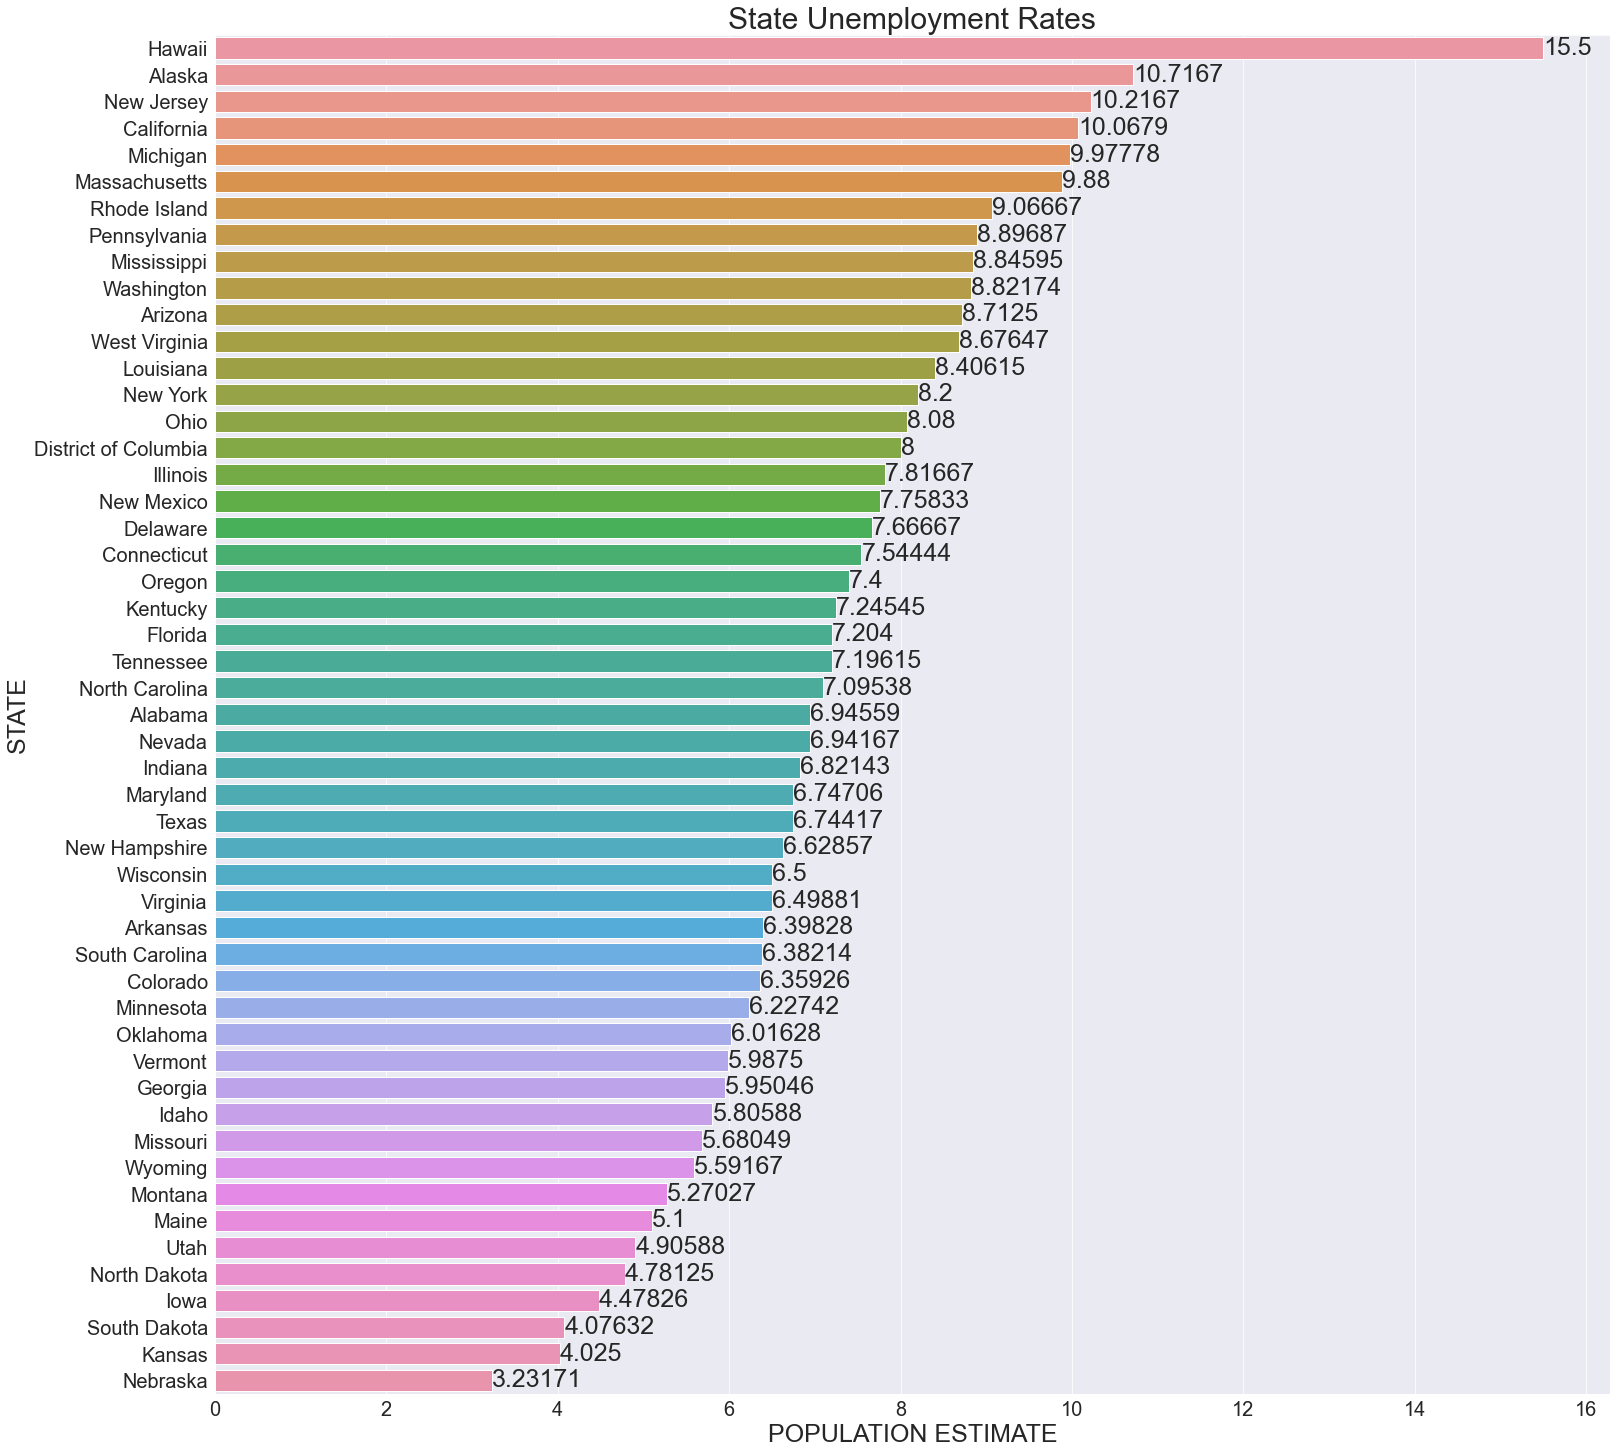

In [84]:
rate =df_condensed_final.pivot_table(index = 'STATE', aggfunc = {'EMPLOYED2020': 'mean'} ).reset_index()
ax7 = sns.barplot(data=rate, x="Unemployment_rate_2020", y="STATE", 
                  order=rate.sort_values('Unemployment_rate_2020',ascending=False).STATE, errwidth=0)
ax7.bar_label(ax7.containers[0], fontsize=25)
ax7.set_title('State Unemployment Rates',fontsize=30)
plt.rcParams["figure.figsize"]=25,25
plt.xlabel('POPULATION ESTIMATE', fontsize=25)
plt.ylabel('STATE', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Let us then take a closer look at the states with the highest unemployment rate:

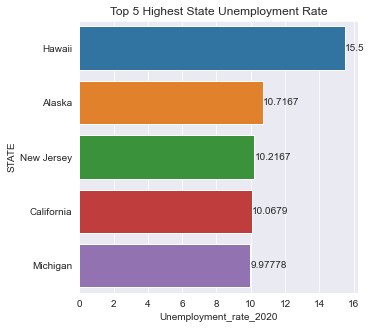

In [69]:
ax1 = sns.barplot(data=rate.nlargest(5,'Unemployment_rate_2020'), x="Unemployment_rate_2020", y="STATE", errwidth=0)
ax1.bar_label(ax1.containers[0])
ax1.set_title('Top 5 Highest State Unemployment Rate')
plt.rcParams["figure.figsize"]=5,5
plt.show()

The top 3 unemployment rates are as follows:
1.) Hawaii
2.) Nevada
3.) California

What we can notice here is that Hawaii and Alaska has the highest unemployment rate, while having one of the lowest population estimates in the US. This deviates from the almost perfect correlation between population estimate and unemployment. This is a possible indicator of low economic activity in these areas, but further research needs to be done. 


Let us now take into account how many incidents and deaths happened overall. We will use our master dataset for this, as there is a unique ID per incident. 

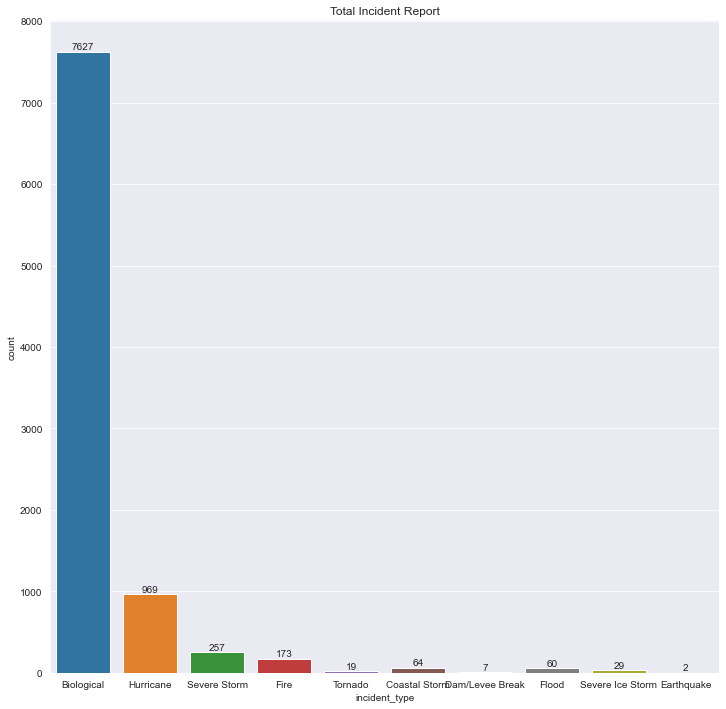

In [89]:
ax3 = sns.countplot(data=df_master, x="incident_type")
ax3.bar_label(ax3.containers[0])
ax3.set_title('Total Incident Report')
plt.rcParams["figure.figsize"]=12,12
plt.show()

We can clearly see that Biological Causes are the main cause of deaths. It is also noted that excluding biological causes, hurricanes are also considerably higher than the other categories, as there were numerous deadly hurricanes, the most notable of which was Hurricane Laura, which hit the states of Louisiana and Texas the hardest.

Let us now then look at the states with the highest deaths. Let us also take into consideration the Top 3 states, as well as Louisiana. 

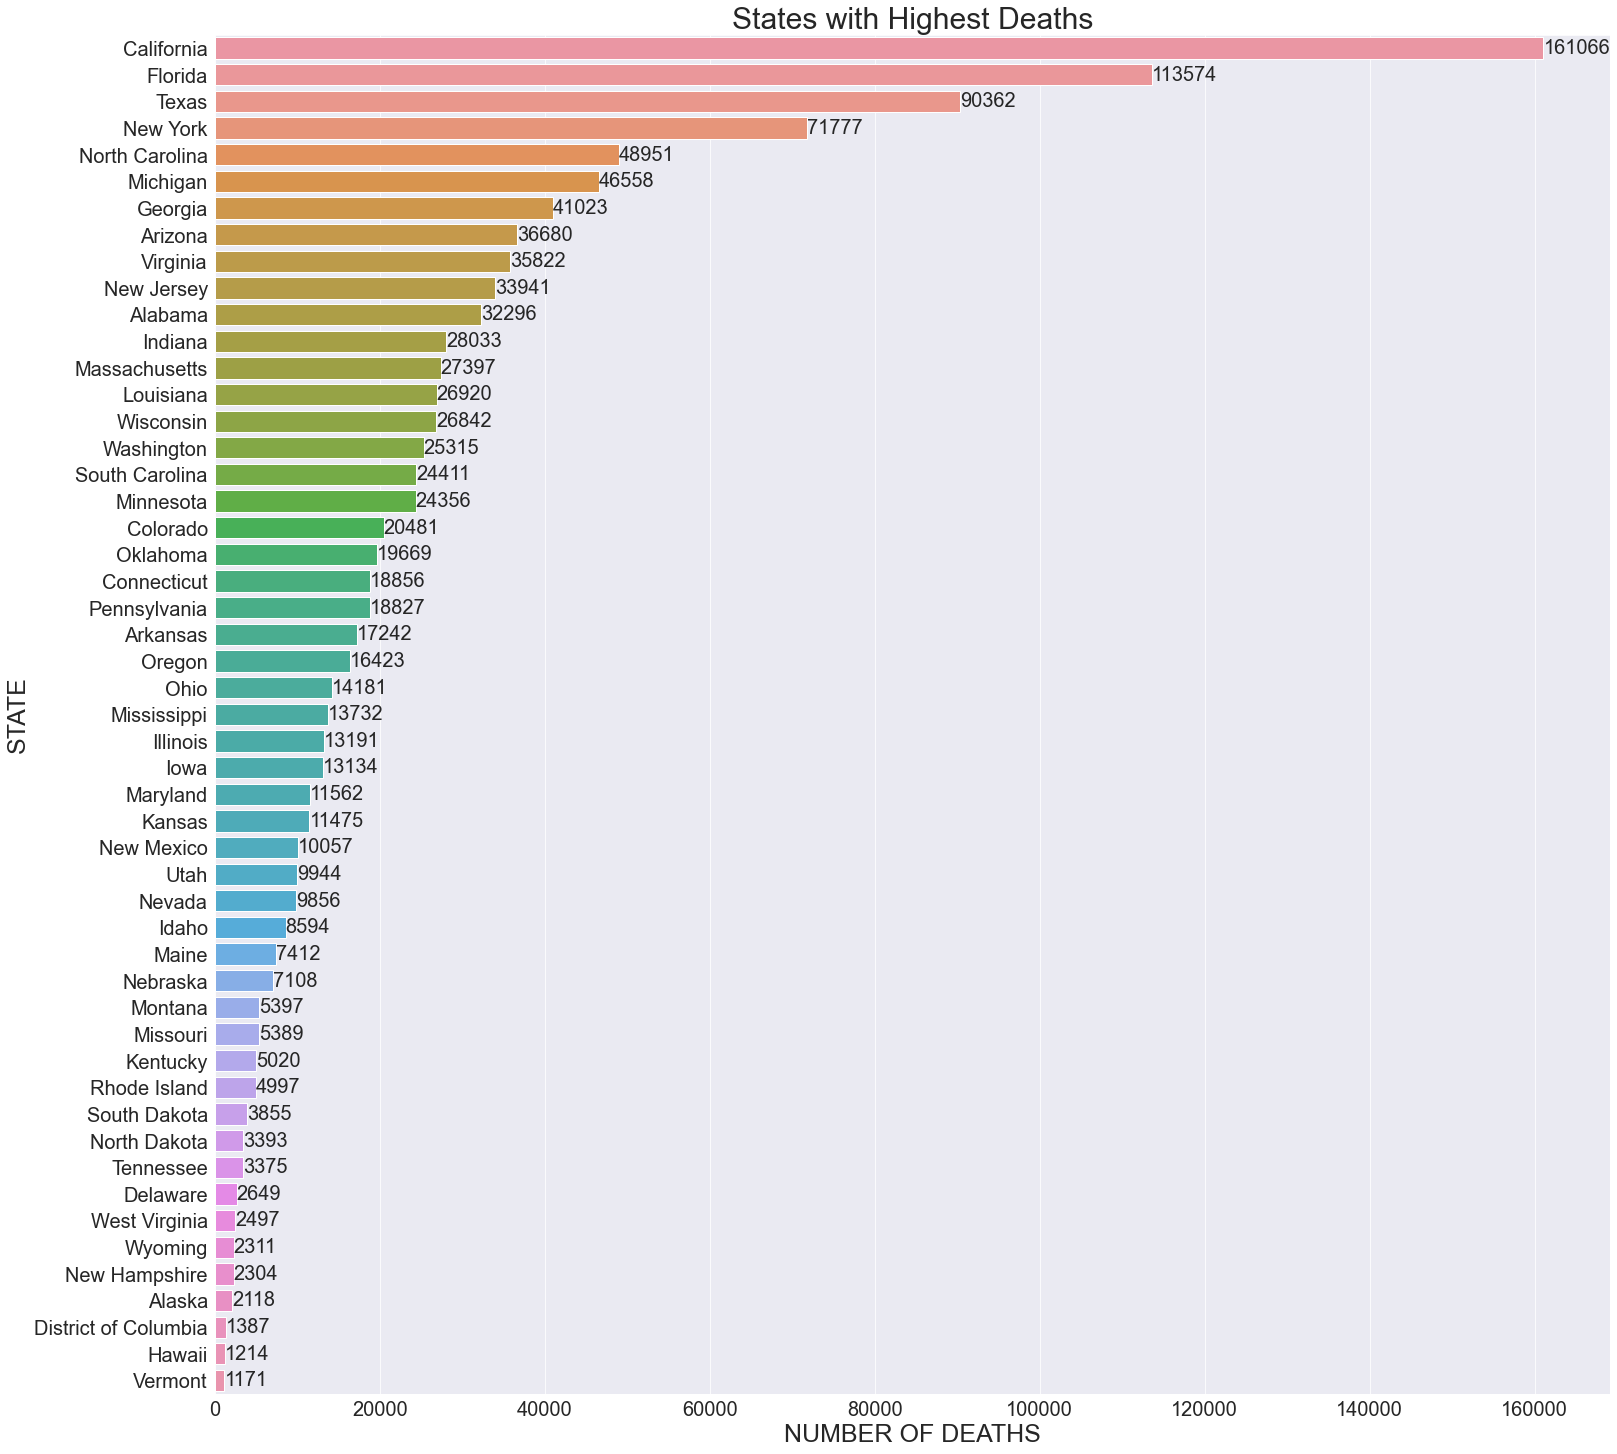

In [74]:
deaths = df_condensed_final.pivot_table(index = 'STATE', aggfunc = {'DEATHS2020': 'sum'} ).reset_index()
ax4 = sns.barplot(data=deaths, x="DEATHS2020", y="STATE",  order=deaths.sort_values('DEATHS2020',ascending=False).STATE,errwidth=0)
ax4.bar_label(ax4.containers[0], fontsize=20)
ax4.set_title('States with Highest Deaths',fontsize=30)
plt.rcParams["figure.figsize"]=25,25
plt.xlabel('NUMBER OF DEATHS', fontsize=25)
plt.ylabel('STATE', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Let us make visuals for each state of interest:

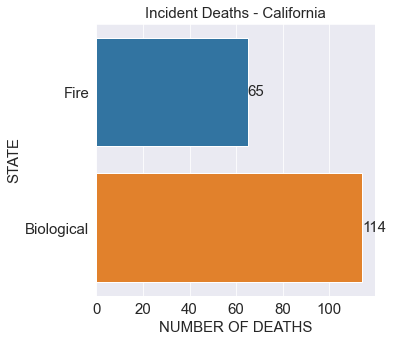

In [76]:
# California
df_Cali = df_master[df_master['STATE']=='California']
ax5 = sns.countplot(data = df_Cali,y = 'incident_type')
ax5.bar_label(ax5.containers[0], fontsize=15)
ax5.set_title('Incident Deaths - California',fontsize=15)
plt.rcParams["figure.figsize"]=5,5
plt.xlabel('NUMBER OF DEATHS', fontsize=15)
plt.ylabel('STATE', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

California was affected by wildfires, especially since a record was set for California with it leading to damages >$12 Billion. Despite that, it still shows as one of the highest median income, whilst also having the 3rd highest unemployment rate.

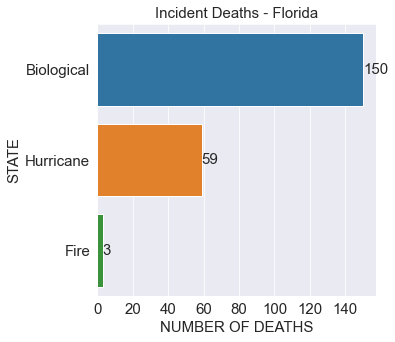

In [77]:
# Florida
df_Flor = df_master[df_master['STATE']=='Florida']
ax5 = sns.countplot(data = df_Flor,y = 'incident_type')
ax5.bar_label(ax5.containers[0], fontsize=15)
ax5.set_title('Incident Deaths - Florida',fontsize=15)
plt.rcParams["figure.figsize"]=5,5
plt.xlabel('NUMBER OF DEATHS', fontsize=15)
plt.ylabel('STATE', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

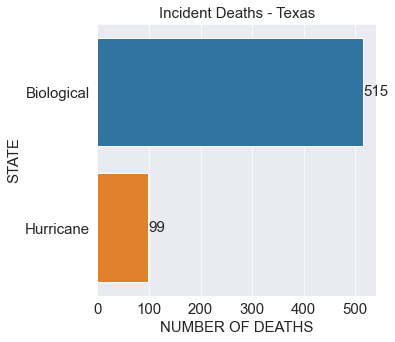

In [78]:
# Texas
df_Texas = df_master[df_master['STATE']=='Texas']
ax5 = sns.countplot(data = df_Texas,y = 'incident_type')
ax5.bar_label(ax5.containers[0], fontsize=15)
ax5.set_title('Incident Deaths - Texas',fontsize=15)
plt.rcParams["figure.figsize"]=5,5
plt.xlabel('NUMBER OF DEATHS', fontsize=15)
plt.ylabel('STATE', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Hurricanes really do affect economic activity, as most features are either halted or destroyed, and as such, could lead to lower income and higher unemployment. This could be the case for Texas, as it was one of the states affected. This could be the case, as it led to it being in the upper half for unemployment rates. 

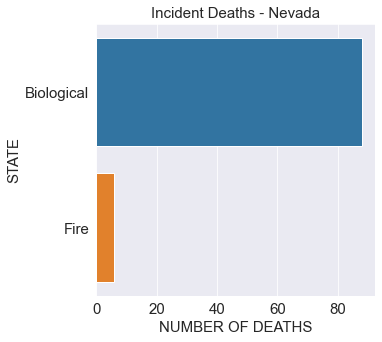

In [79]:
# Nevada (Highest Unemployment Rate)
df_Nev = df_master[df_master['STATE']=='Nevada']
ax8 = sns.countplot(data = df_Nev,y = 'incident_type')
ax8.bar_label(ax5.containers[0], fontsize=15)
ax8.set_title('Incident Deaths - Nevada',fontsize=15)
plt.rcParams["figure.figsize"]=5,5
plt.xlabel('NUMBER OF DEATHS', fontsize=15)
plt.ylabel('STATE', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

This is an interesting occurrence, as there were minimal instances of disasters for Nevada, but they have the highest unemployment rate. This could be an indicator that there is not much economical activity there.

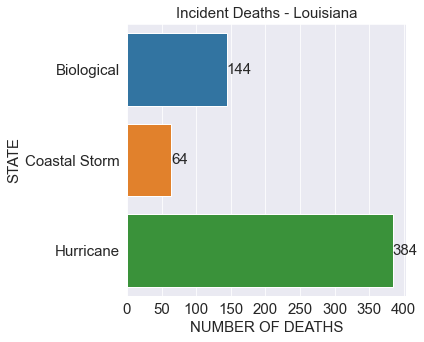

In [80]:
# Louisiana
df_Louis = df_master[df_master['STATE']=='Louisiana']
ax5 = sns.countplot(data = df_Louis,y = 'incident_type')
ax5.bar_label(ax5.containers[0], fontsize=15)
ax5.set_title('Incident Deaths - Louisiana',fontsize=15)
plt.rcParams["figure.figsize"]=5,5
plt.xlabel('NUMBER OF DEATHS', fontsize=15)
plt.ylabel('STATE', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Hurricanes really do affect economic activity, as most features are either halted or destroyed, and as such, could lead to lower income. This could be the case for Louisiana, as this was hit by Hurricane Laura, which dealt around $76 Billion in damages. This also meant that unemployment was relatively high, with it being in the top 10 states for highest unemployment rate. 


# CONCLUSION <a id='conclusion'></a>

With the following visuals and insights, the researchers have made the following conclusions:

1. Incidents, particularly disasters do have an effect on unemployment in general, as these normally lead to an abrupt decline in economic activity and in return, an increase in unemployment rate. 


2. Higher migration movement is consistent with our correlation in relation to employment, as it can be noticed that an increase in migration movement generally also increases number of employed people. However, it does not necessarily mean that it leads to higher household income. Further research needs to be done to investigate these causes. 


3. There are also some states that had the highest unemployment rate, while having the lowest population estimate, which is consistent with our correlation heatmap that there is almost no correlation between population estimate and unemployment rate. As such, it may be because of other causes (e.g. low economic activity), but further research needs to be done. 